<Figure size 1000x600 with 0 Axes>

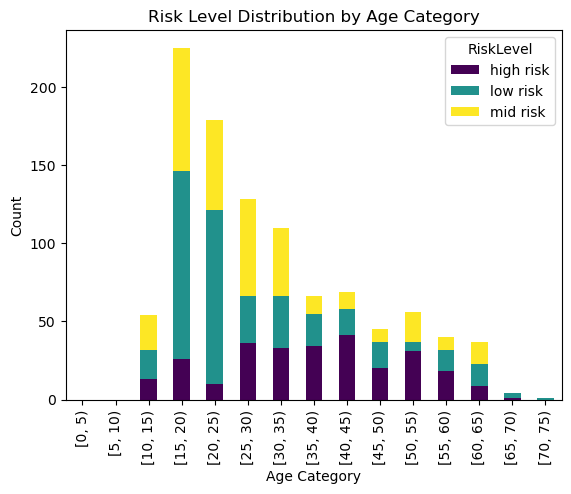

In [228]:
#prediction of pregnancy complication 
#Prabhudutta Hota
#Swapnil Mohanty


import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
data = pd.read_csv("Dataset.csv")
#Categoriing age into intervals of 5
df['AgeCategory'] = pd.cut(df['Age'], bins=range(0, df['Age'].max() + 6, 5), right=False)
# Frequency of risk levels 
grouped_data = df.groupby(['AgeCategory', 'RiskLevel']).size().unstack()
risk_levels = df['RiskLevel'].unique()
grouped_data = grouped_data[risk_levels]
# Creating a stacked bar plot based on frequency
plt.figure(figsize=(10, 6))
grouped_data.plot(kind='bar', stacked=True, colormap='viridis')
plt.xlabel('Age Category')
plt.ylabel('Count')
plt.title('Risk Level Distribution by Age Category')
plt.show()


<Figure size 1000x600 with 0 Axes>

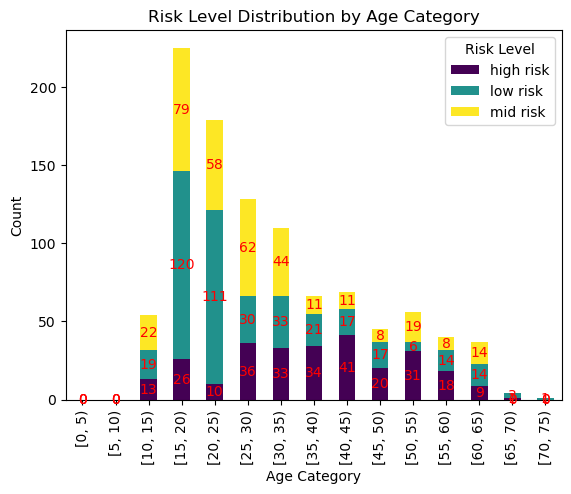

In [235]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Read the dataset
data = pd.read_csv("Dataset.csv")

# Categorize age into intervals of 5
data['AgeCategory'] = pd.cut(data['Age'], bins=range(0, data['Age'].max() + 6, 5), right=False)

# Compute the frequency of risk levels 
grouped_data = data.groupby(['AgeCategory', 'RiskLevel']).size().unstack()
risk_levels = data['RiskLevel'].unique()
grouped_data = grouped_data[risk_levels]

# Creating a stacked bar plot based on frequency
plt.figure(figsize=(10, 6))
ax = grouped_data.plot(kind='bar', stacked=True, colormap='viridis')

# Add labels and counts for each stack with red text color
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{int(height)}', (x + width / 2, y + height / 2), ha='center', va='center', color='red')

plt.xlabel('Age Category')
plt.ylabel('Count')
plt.title('Risk Level Distribution by Age Category')
plt.legend(title='Risk Level')
plt.show()


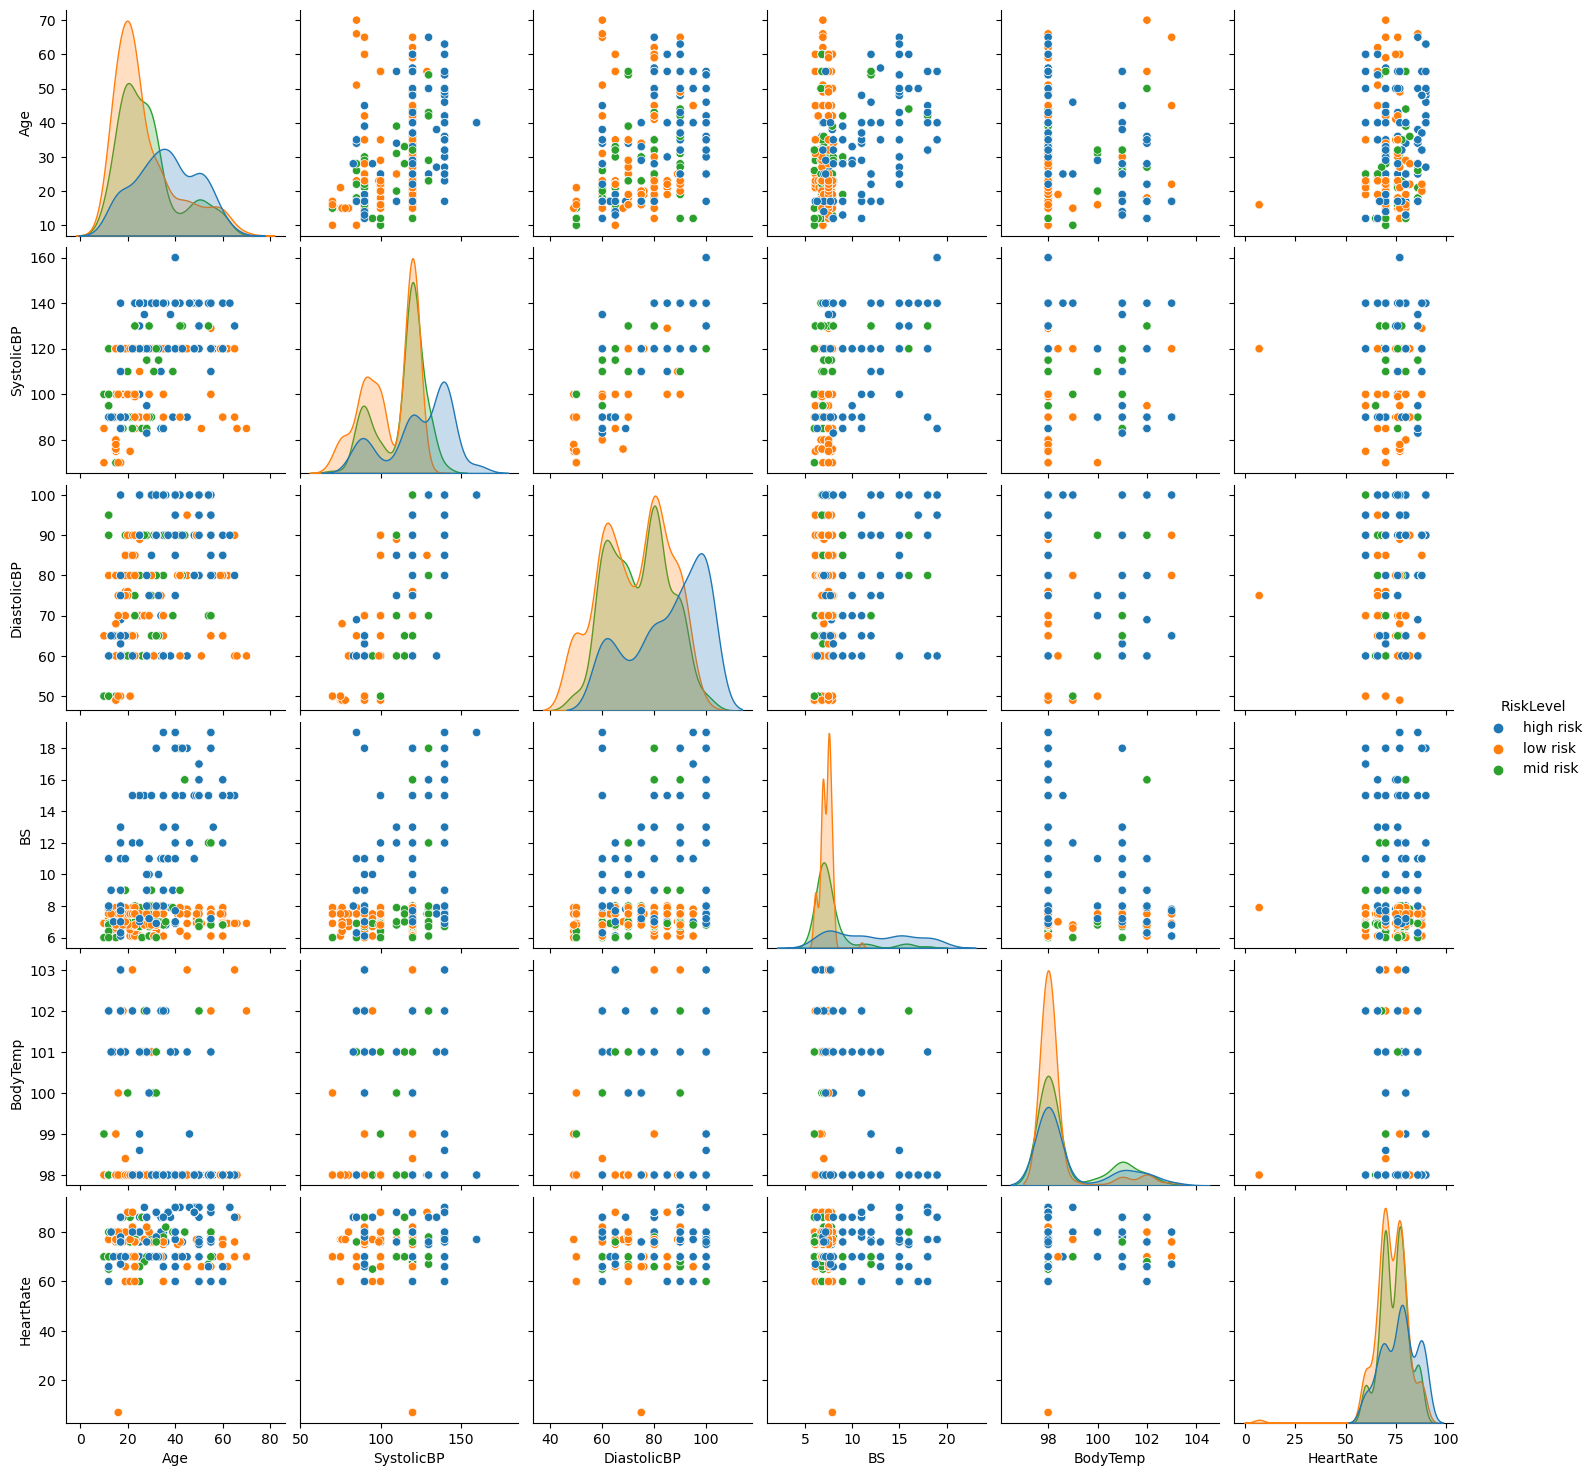

In [190]:
sns.pairplot(df, hue="RiskLevel")
plt.show()

In [192]:
#Data cleaning

missing_values = df.isnull().sum()
print("Columns with missing values:")
print(missing_values[missing_values > 0])
# Replacing the missing value with the mean value.
df.fillna(df.mean(), inplace=True)

# Cross checking
missing_values_after_imputation = df.isnull().sum()
print("Columns with missing values after imputation:")
print(missing_values_after_imputation[missing_values_after_imputation > 0])


Columns with missing values:
Series([], dtype: int64)
Columns with missing values after imputation:
Series([], dtype: int64)


C:\Users\HP\AppData\Local\Temp\ipykernel_32372\3383873321.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.fillna(df.mean(), inplace=True)


In [51]:
#therefore we conluded there are no missing values and no need of modicifaction

In [193]:
#Categorical variables
categorical_vars = ['RiskLevel']
df_encoded = pd.get_dummies(df, columns=categorical_vars)
print(df_encoded)


      Age  SystolicBP  DiastolicBP    BS  BodyTemp  HeartRate AgeCategory  \
0      25         130           80  15.0      98.0         86    [25, 30)   
1      35         140           90  13.0      98.0         70    [35, 40)   
2      29          90           70   8.0     100.0         80    [25, 30)   
3      30         140           85   7.0      98.0         70    [30, 35)   
4      35         120           60   6.1      98.0         76    [35, 40)   
...   ...         ...          ...   ...       ...        ...         ...   
1009   22         120           60  15.0      98.0         80    [20, 25)   
1010   55         120           90  18.0      98.0         60    [55, 60)   
1011   35          85           60  19.0      98.0         86    [35, 40)   
1012   43         120           90  18.0      98.0         70    [40, 45)   
1013   32         120           65   6.0     101.0         76    [30, 35)   

      RiskLevel_high risk  RiskLevel_low risk  RiskLevel_mid risk  
0      

           Age  SystolicBP  DiastolicBP        BS  BodyTemp  HeartRate
0    -0.361738    0.913396     0.255023  1.905890 -0.485215   1.446956
1     0.380777    1.457027     0.975539  1.298340 -0.485215  -0.532088
2    -0.064732   -1.261127    -0.465493 -0.220537  0.973884   0.704815
3     0.009519    1.457027     0.615281 -0.524312 -0.485215  -0.532088
4     0.380777    0.369765    -1.186009 -0.797710 -0.485215   0.210054
...        ...         ...          ...       ...       ...        ...
1009 -0.584493    0.369765    -1.186009  1.905890 -0.485215   0.704815
1010  1.865807    0.369765     0.975539  2.817216 -0.485215  -1.768990
1011  0.380777   -1.532942    -1.186009  3.120991 -0.485215   1.446956
1012  0.974789    0.369765     0.975539  2.817216 -0.485215  -0.532088
1013  0.158022    0.369765    -0.825751 -0.828087  1.703434   0.210054

[1014 rows x 6 columns]


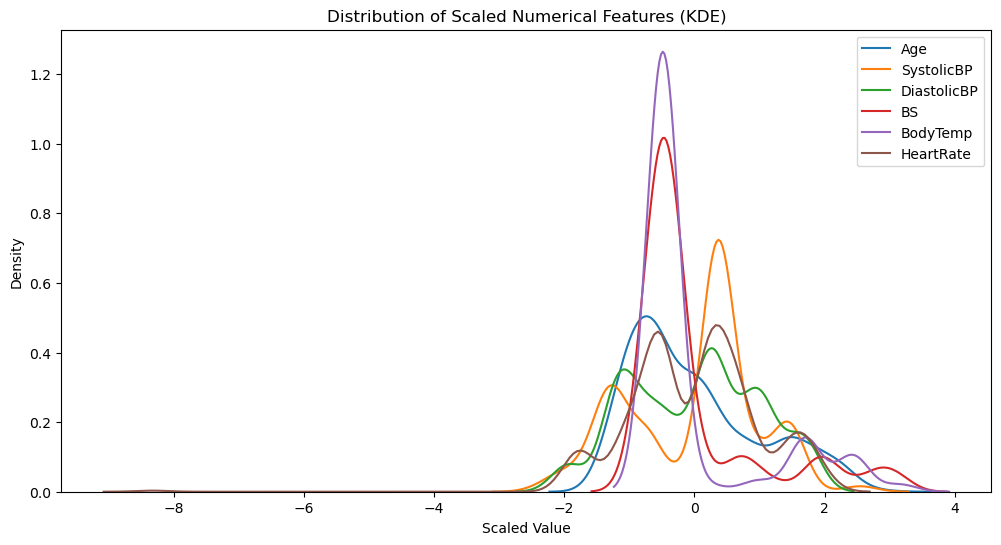

In [238]:
from sklearn.preprocessing import StandardScaler

numerical_features = ['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate']
# Creating a new DataFrame with only the numerical features
df_numerical = df[numerical_features]
# feature scaling using standardization
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_numerical), columns=numerical_features)
print(df_scaled)
plt.figure(figsize=(12, 6))
for feature in numerical_features:
    sns.kdeplot(df_scaled[feature], label=feature)

plt.xlabel('Scaled Value')
plt.ylabel('Density')
plt.title('Distribution of Scaled Numerical Features (KDE)')
plt.legend()
plt.show()

In [63]:
#Distribution Shape: The shape of the KDE curves provides insights into the distribution of the features. For example, if a curve is symmetric and bell-shaped, it indicates a normal or Gaussian distribution. If a curve is skewed to the left or right, it suggests a skewed distribution.

#Range of Values: The KDE plot allows us to observe the range of values for each feature. The spread of the curves indicates the variability or dispersion of the data. Features with wider curves have a larger range of values, while features with narrower curves have a more concentrated range.

#Overlapping Curves: By comparing the curves, we can identify any overlapping regions. When curves overlap, it suggests that the corresponding features have similar distributions and may exhibit similar patterns or relationships.

#Outliers: The KDE plot can help identify potential outliers. Outliers are data points that significantly deviate from the overall distribution. They appear as isolated peaks or spikes in the KDE plot.

#Skewness and Kurtosis: The shape of the KDE curves provides insights into the skewness (lack of symmetry) and kurtosis (peakedness) of the feature distributions. Positive skewness indicates a longer tail on the right side of the distribution, while negative skewness indicates a longer tail on the left side. Kurtosis measures the relative peakedness of the distribution compared to a normal distribution.

#Overall, the KDE plot helps us understand the distributional characteristics of the numerical features after scaling. It allows us to identify any anomalies, assess the range and variability, and compare the distributions across different features.

#It's important to interpret the KDE plot in conjunction with domain knowledge and the specific context of the dataset to draw meaningful conclusions.

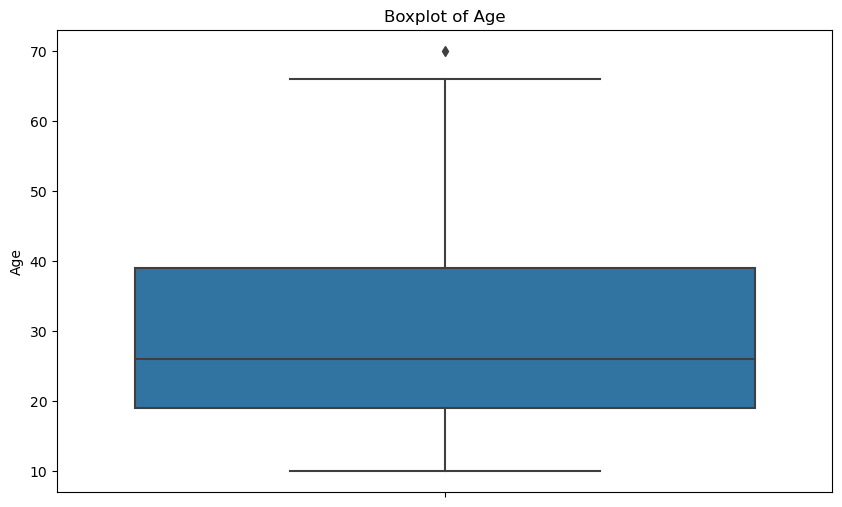

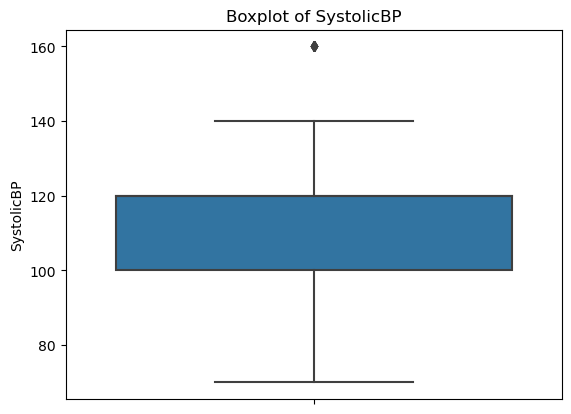

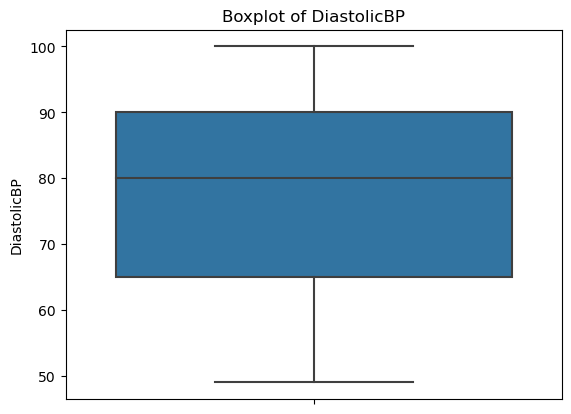

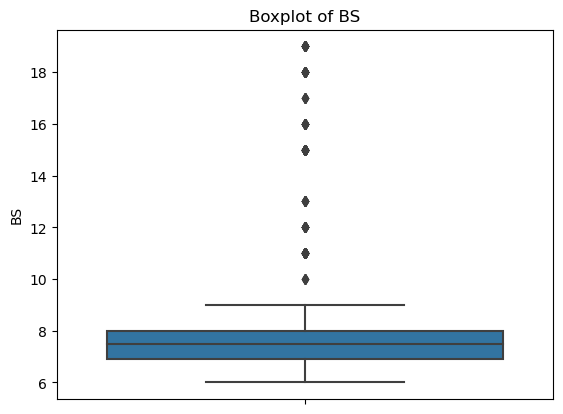

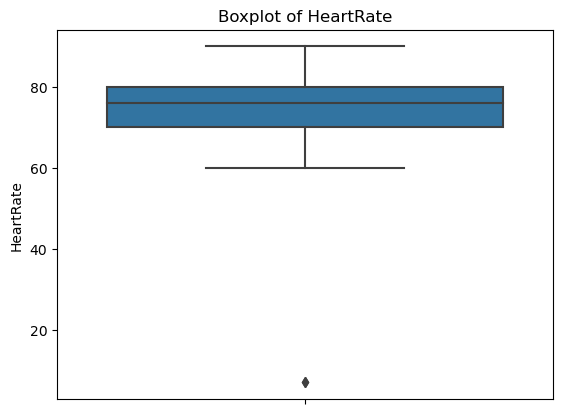

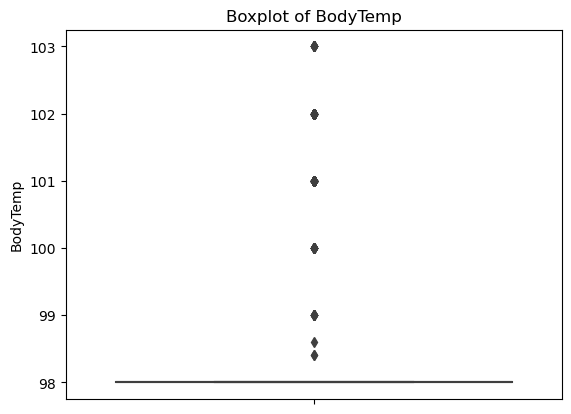

Cleaned Dataset:
      Age  SystolicBP  DiastolicBP    BS  BodyTemp  HeartRate  RiskLevel  \
0      25         130           80  15.0      98.0         86  high risk   
1      35         140           90  13.0      98.0         70  high risk   
2      29          90           70   8.0     100.0         80  high risk   
3      30         140           85   7.0      98.0         70  high risk   
4      35         120           60   6.1      98.0         76   low risk   
...   ...         ...          ...   ...       ...        ...        ...   
1008   48         120           80  11.0      98.0         88  high risk   
1009   22         120           60  15.0      98.0         80  high risk   
1010   55         120           90  18.0      98.0         60  high risk   
1012   43         120           90  18.0      98.0         70  high risk   
1013   32         120           65   6.0     101.0         76   mid risk   

     AgeCategory  
0       [25, 30)  
1       [35, 40)  
2       [25, 

In [239]:
# outlier detection
numerical_variables = ['Age', 'SystolicBP', 'DiastolicBP','BS','HeartRate','BodyTemp']
plt.figure(figsize=(10, 6))
for variable in numerical_variables:
    sns.boxplot(data=df, y=variable)
    plt.title(f'Boxplot of {variable}')
    plt.show()
z_scores = (df[numerical_variables] - df[numerical_variables].mean()) / df[numerical_variables].std()
threshold = 3 #thresold for outlier detection
outlier_indices = z_scores.abs() > threshold
df_cleaned = df[~outlier_indices.any(axis=1)]
print("Cleaned Dataset:")
print(df_cleaned)


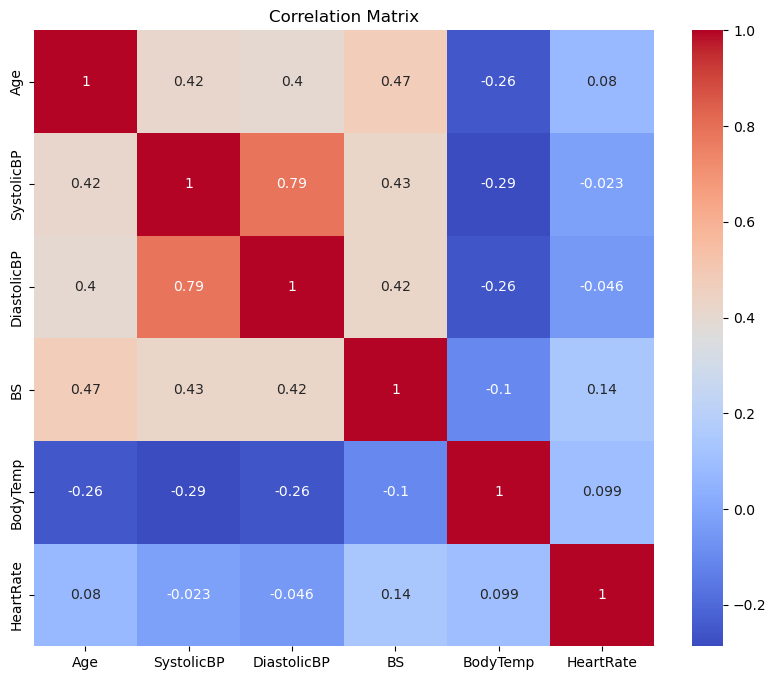

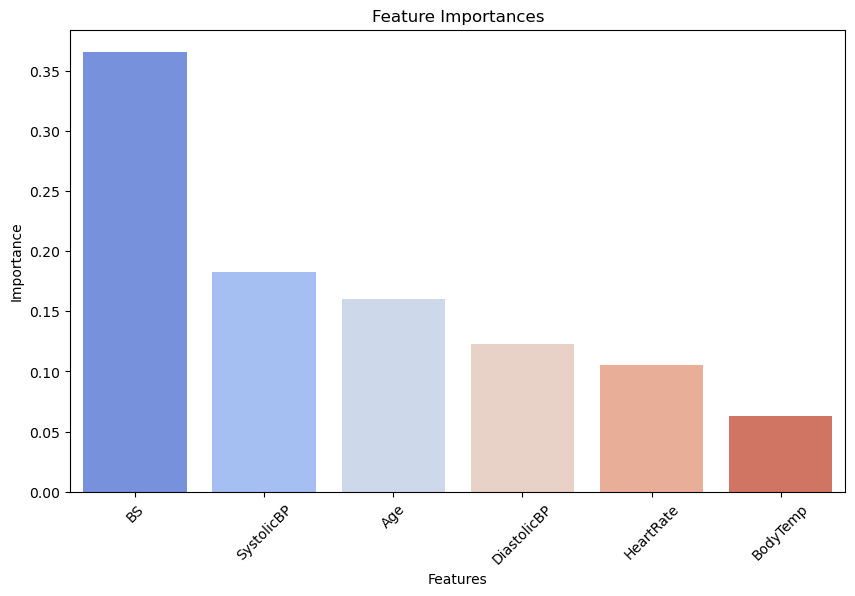

In [199]:

from sklearn.ensemble import RandomForestClassifier

features = ['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate']
correlation_matrix = df[features].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Determination of feature importance
X = df[features]
y = df['RiskLevel']
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X, y)
feature_importances = rf_classifier.feature_importances_
sorted_indices = np.argsort(feature_importances)[::-1]
sorted_features = [features[i] for i in sorted_indices]

# Plotting the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=sorted_features, y=feature_importances[sorted_indices], palette='coolwarm')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.xticks(rotation=45)
plt.show()


In [208]:
import pandas as pd
from sklearn.model_selection import train_test_split

X = df.drop('RiskLevel', axis=1)
y = df['RiskLevel']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (811, 6) (811,)
Testing set shape: (203, 6) (203,)


In [209]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(max_iter=1500)
logreg.fit(X_train, y_train)
print("Coefficients:", logreg.coef_)
print("Intercept:", logreg.intercept_)


Coefficients: [[-0.01542409  0.01909324  0.02557344  0.34638091  0.25826493  0.03756106]
 [ 0.00967139 -0.04231419  0.00439691 -0.3503409  -0.41985246 -0.03161879]
 [ 0.0057527   0.02322095 -0.02997035  0.00395999  0.16158753 -0.00594227]]
Intercept: [-35.25557309  50.95316984 -15.69759675]


In [210]:
import joblib
# Saving the trained model to a file
joblib.dump(logreg, 'logistic_regression_model.joblib')


['logistic_regression_model.joblib']

In [75]:
import joblib
logreg = joblib.load('logistic_regression_model.joblib')

In [211]:
new_data = pd.DataFrame({
    'Age': [25, 30, 35],
    'SystolicBP': [120, 130, 140],
    'DiastolicBP': [80, 85, 90],
    'BS': [120, 130, 140],
    'BodyTemp': [36.5, 36.8, 37.2],
    'HeartRate': [70, 75, 80]
})
new_data



,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
0,25,120,80,120,36.5,70
1,30,130,85,130,36.8,75
2,35,140,90,140,37.2,80


In [212]:
predictions = logreg.predict(new_data)
print(predictions)

['high risk' 'high risk' 'high risk']


In [213]:
from sklearn.metrics import accuracy_score
train_predictions = logreg.predict(X_train)
accuracy = accuracy_score(y_train, train_predictions)
print("Training Accuracy:", accuracy)

Training Accuracy: 0.6473489519112207


C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fold 1 - Accuracy: 0.6568627450980392
Confusion matrix:


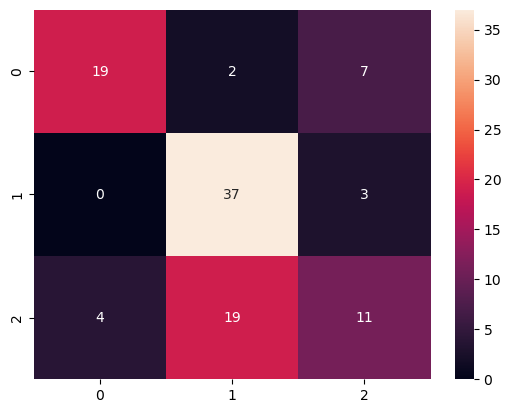

Fold 2 - Accuracy: 0.696078431372549
Confusion matrix:


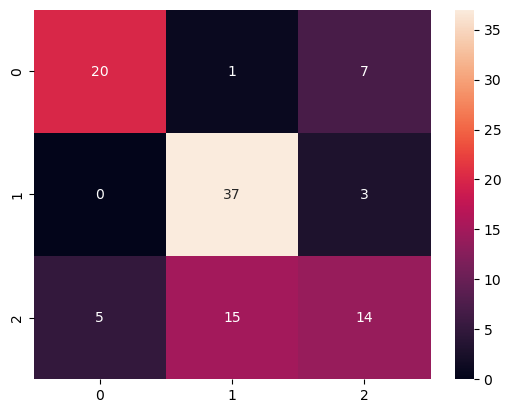

Fold 3 - Accuracy: 0.6372549019607843
Confusion matrix:


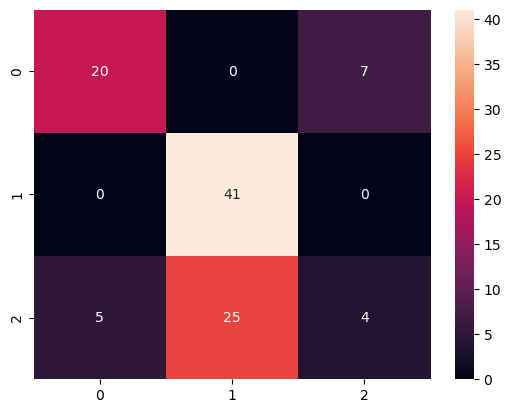

Fold 4 - Accuracy: 0.5882352941176471
Confusion matrix:


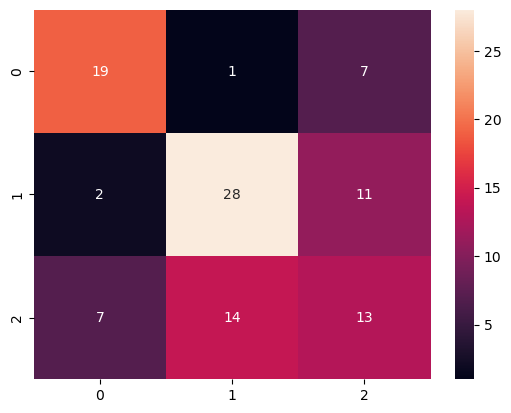

Fold 5 - Accuracy: 0.6138613861386139
Confusion matrix:


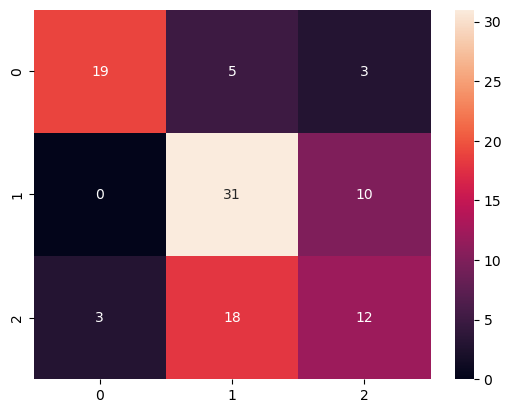

Fold 6 - Accuracy: 0.6039603960396039
Confusion matrix:


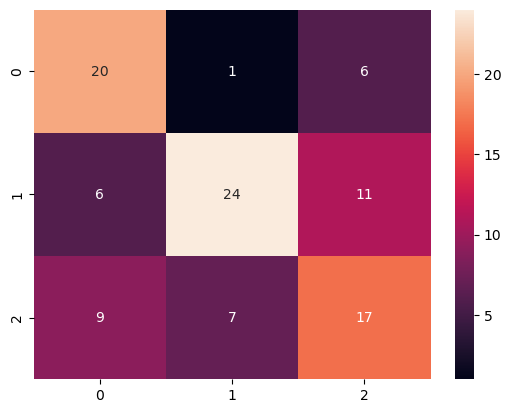

Fold 7 - Accuracy: 0.6534653465346535
Confusion matrix:


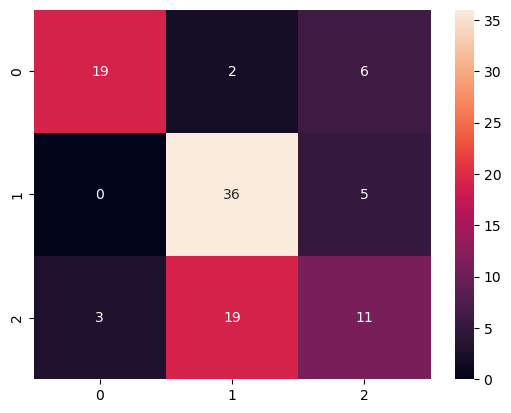

Fold 8 - Accuracy: 0.46534653465346537
Confusion matrix:


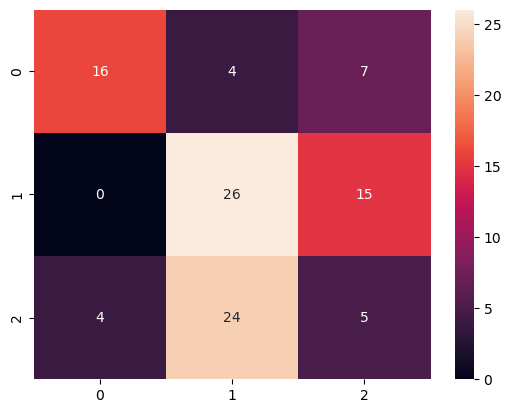

Fold 9 - Accuracy: 0.594059405940594
Confusion matrix:


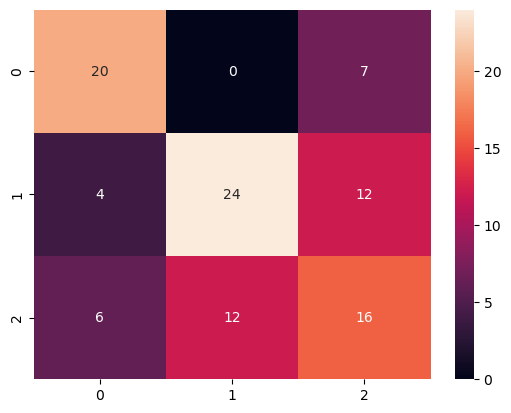

Fold 10 - Accuracy: 0.6336633663366337
Confusion matrix:


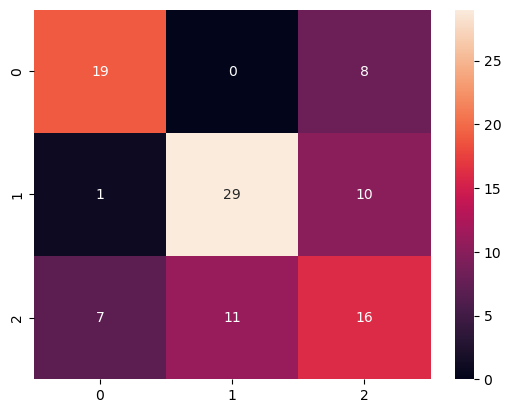

Average Accuracy: 0.6142787808192585


In [214]:
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix

skf = StratifiedKFold(n_splits=10)
accuracies = []

for fold_idx, (train_index, val_index) in enumerate(skf.split(X, y)):
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y[train_index], y[val_index]

    logreg = LogisticRegression(max_iter=1500)
    logreg.fit(X_train, y_train)
    y_val_pred = logreg.predict(X_val)

    # Calculating accuracy and appending it to the accuracies list
    accuracy = accuracy_score(y_val, y_val_pred)
    accuracies.append(accuracy)

    #Confusion matrix
    print(f"Fold {fold_idx + 1} - Accuracy: {accuracy}")
    print("Confusion matrix:")
    cm = confusion_matrix(y_val, y_val_pred)
    sns.heatmap(cm, annot=True)
    plt.show()
avg_accuracy = sum(accuracies) / len(accuracies)
print("Average Accuracy:", avg_accuracy)


In [216]:
#Polynomial Regression

import pandas as pd
from sklearn.preprocessing import PolynomialFeatures, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

df = pd.read_csv('Dataset.csv')
X = df.drop('RiskLevel', axis=1)
y = df['RiskLevel']
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42)
poly_features = PolynomialFeatures(degree=2)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)
poly_regression = LinearRegression()

# Training the model
poly_regression.fit(X_train_poly, y_train)

# Making predictions
y_pred_train = poly_regression.predict(X_train_poly)
y_pred_test = poly_regression.predict(X_test_poly)

# Evaluating the model
train_accuracy = poly_regression.score(X_train_poly, y_train)
test_accuracy = poly_regression.score(X_test_poly, y_test)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
X = df.drop('RiskLevel', axis=1)
y = df['RiskLevel']
degree = 2
poly_features = PolynomialFeatures(degree=degree, include_bias=False)
X_poly = poly_features.fit_transform(X)
poly_reg = LinearRegression()
cv_scores = cross_val_score(poly_reg, X_poly, y, cv=10, scoring='accuracy')
avg_accuracy = np.mean(cv_scores)
print("Average Accuracy:", avg_accuracy)


Training Accuracy: 0.08103154692701853
Testing Accuracy: 0.1065979937492767
Average Accuracy: nan


C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
10 fits failed out of a total of 10.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_base.py", line 662, in fit
    X, y = self._validate_data(
  File "C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py", line 581, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\HP\anaconda3\lib\site-packages\sk

Fold 1 - Accuracy: 0.5098039215686274
Confusion matrix:


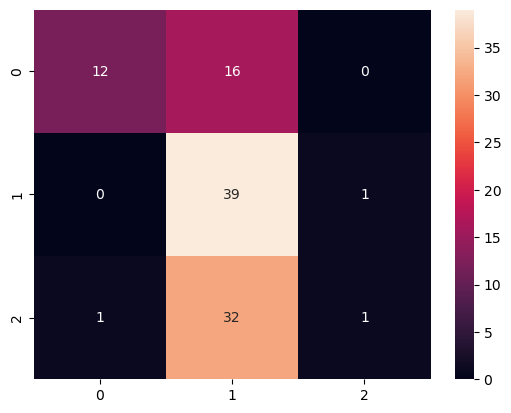

Fold 2 - Accuracy: 0.5196078431372549
Confusion matrix:


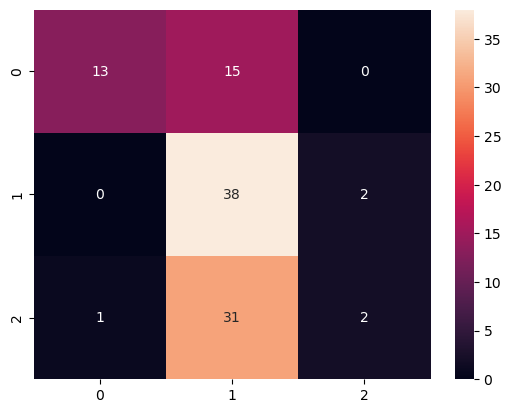

Fold 3 - Accuracy: 0.5
Confusion matrix:


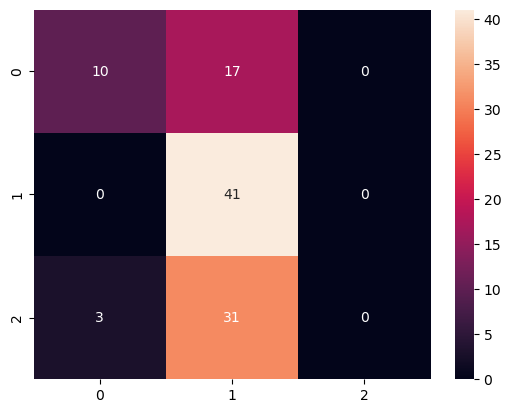

Fold 4 - Accuracy: 0.5392156862745098
Confusion matrix:


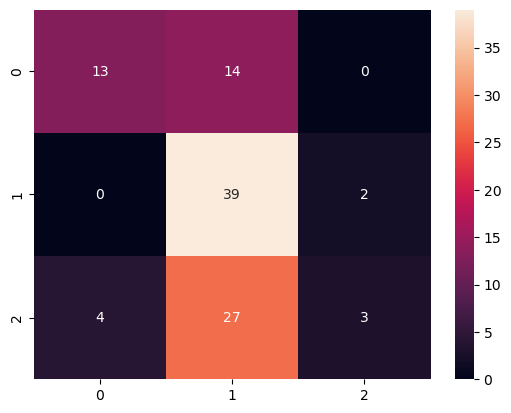

Fold 5 - Accuracy: 0.49504950495049505
Confusion matrix:


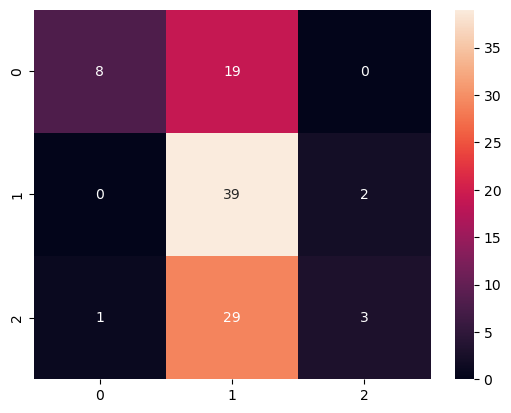

Fold 6 - Accuracy: 0.5445544554455446
Confusion matrix:


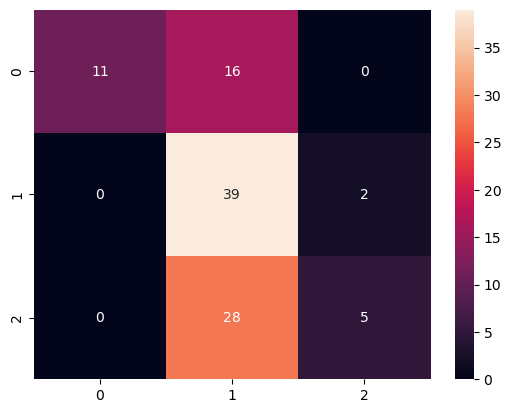

Fold 7 - Accuracy: 0.5445544554455446
Confusion matrix:


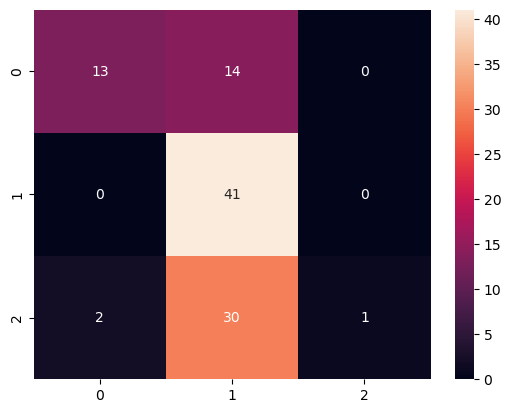

Fold 8 - Accuracy: 0.3564356435643564
Confusion matrix:


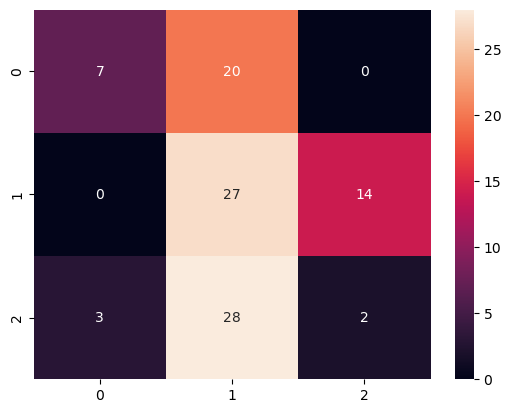

Fold 9 - Accuracy: 0.48514851485148514
Confusion matrix:


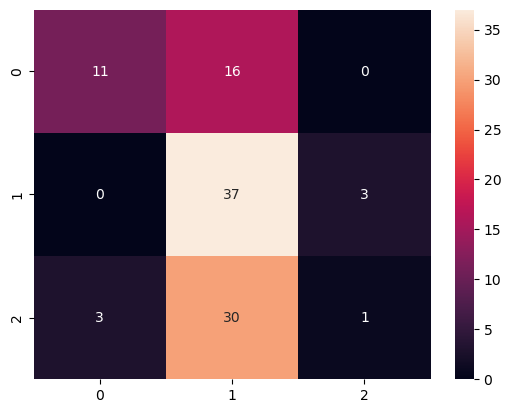

Fold 10 - Accuracy: 0.5346534653465347
Confusion matrix:


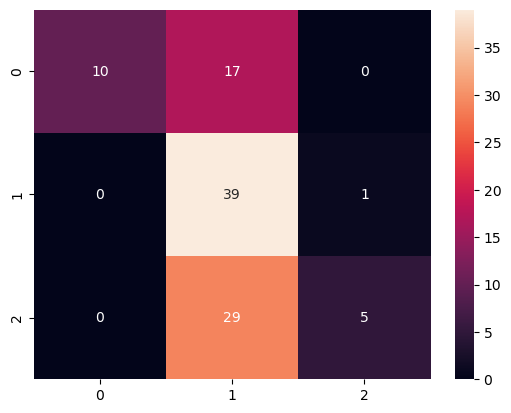

Average Accuracy: 0.5029023490584352


In [217]:
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import MinMaxScaler, OrdinalEncoder
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

skf = StratifiedKFold(n_splits=10)
accuracies = []

for fold_idx, (train_index, val_index) in enumerate(skf.split(X, y)):
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y[train_index], y[val_index]
    ordinal_encoder = OrdinalEncoder()
    y_train_encoded = ordinal_encoder.fit_transform(y_train.values.reshape(-1, 1)).flatten()
    y_val_encoded = ordinal_encoder.transform(y_val.values.reshape(-1, 1)).flatten()
    linreg = LinearRegression()
    linreg.fit(X_train, y_train_encoded)
    y_val_pred_encoded = linreg.predict(X_val)
    y_val_pred = y_val_pred_encoded.round().astype(int)
    accuracy = accuracy_score(y_val_encoded, y_val_pred)
    accuracies.append(accuracy)
    print(f"Fold {fold_idx + 1} - Accuracy: {accuracy}")
    print("Confusion matrix:")
    cm = confusion_matrix(y_val_encoded, y_val_pred)
    sns.heatmap(cm, annot=True)
    plt.show()
avg_accuracy = sum(accuracies) / len(accuracies)
print("Average Accuracy:", avg_accuracy)


Fold 1 - Accuracy: 0.696078431372549
Confusion matrix:


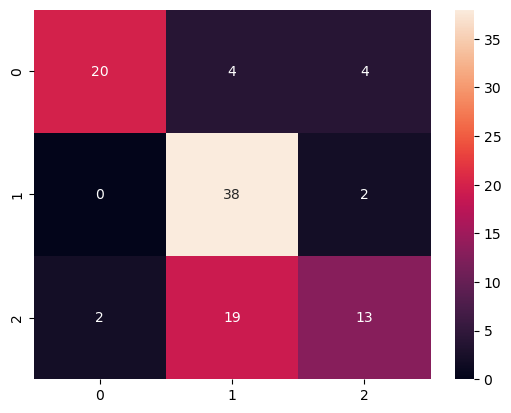

Fold 2 - Accuracy: 0.6568627450980392
Confusion matrix:


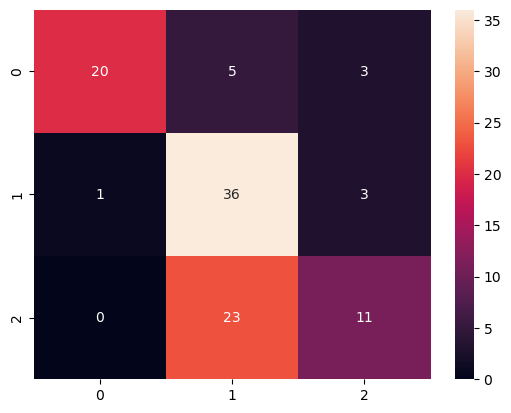

Fold 3 - Accuracy: 0.5588235294117647
Confusion matrix:


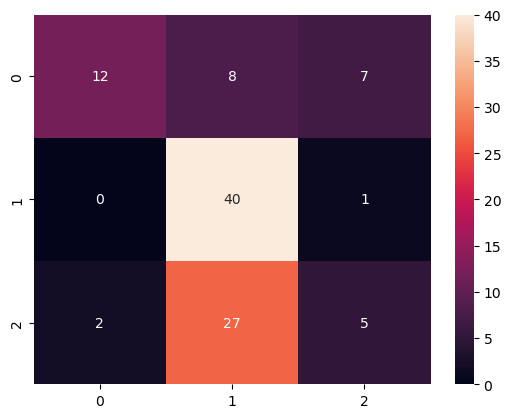

Fold 4 - Accuracy: 0.5294117647058824
Confusion matrix:


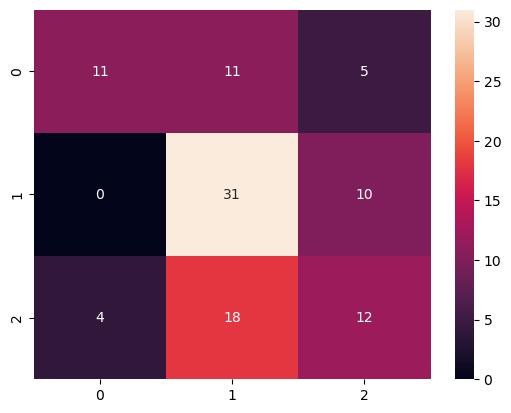

Fold 5 - Accuracy: 0.5544554455445545
Confusion matrix:


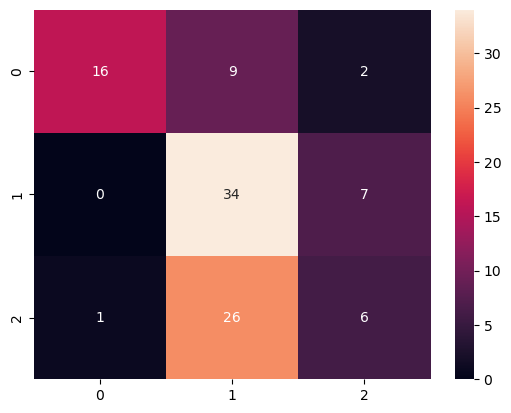

Fold 6 - Accuracy: 0.6732673267326733
Confusion matrix:


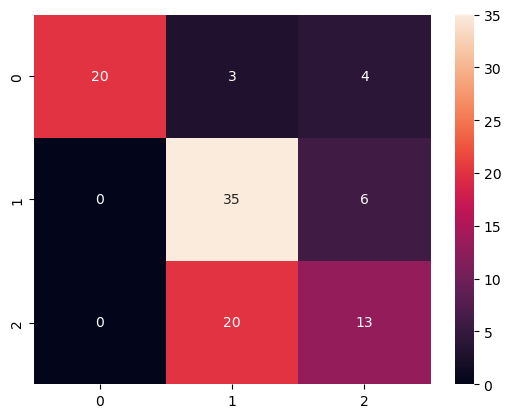

Fold 7 - Accuracy: 0.5841584158415841
Confusion matrix:


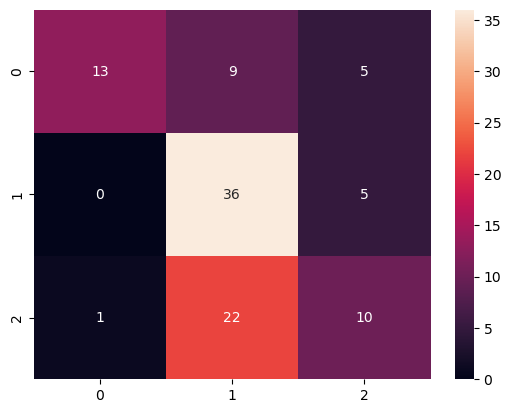

Fold 8 - Accuracy: 0.5346534653465347
Confusion matrix:


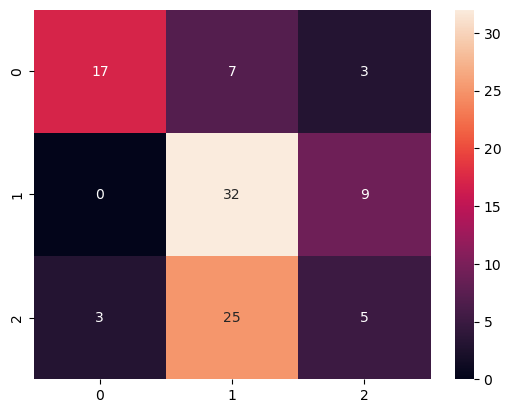

Fold 9 - Accuracy: 0.5742574257425742
Confusion matrix:


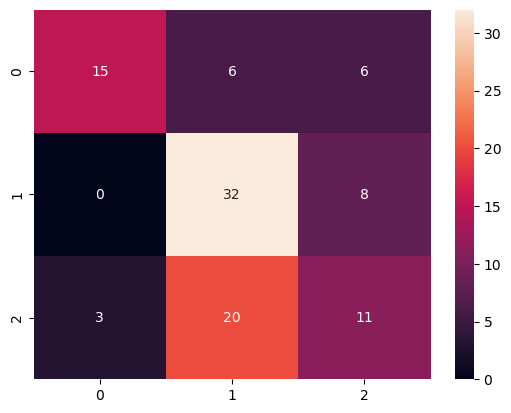

Fold 10 - Accuracy: 0.5643564356435643
Confusion matrix:


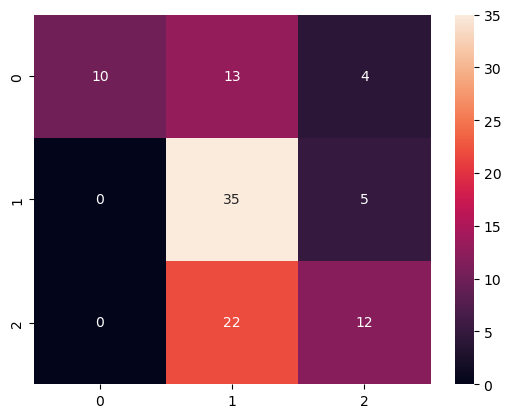

Average Accuracy: 0.5926324985439719


In [160]:
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
X = df.drop('RiskLevel', axis=1)
y = df['RiskLevel']
svm = SVC()
skf = StratifiedKFold(n_splits=10)

accuracies = []
for fold_idx, (train_index, val_index) in enumerate(skf.split(X, y)):
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y[train_index], y[val_index]
    svm.fit(X_train, y_train)
    y_val_pred = svm.predict(X_val)
    accuracy = accuracy_score(y_val, y_val_pred)
    accuracies.append(accuracy)
    print(f"Fold {fold_idx + 1} - Accuracy: {accuracy}")
    print("Confusion matrix:")
    cm = confusion_matrix(y_val, y_val_pred)
    sns.heatmap(cm, annot=True)
    plt.show()
avg_accuracy = sum(accuracies) / len(accuracies)
print("Average Accuracy:", avg_accuracy)


Fold 1 - Accuracy: 0.9607843137254902
Confusion matrix:


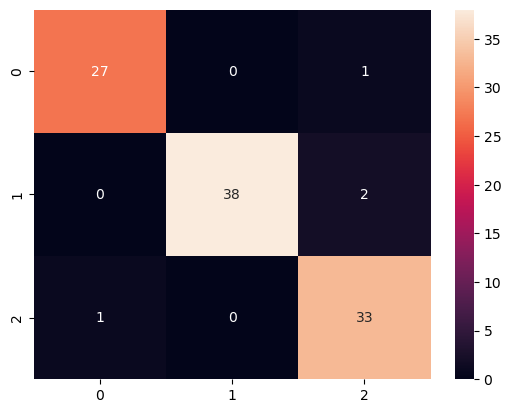

Fold 2 - Accuracy: 0.9901960784313726
Confusion matrix:


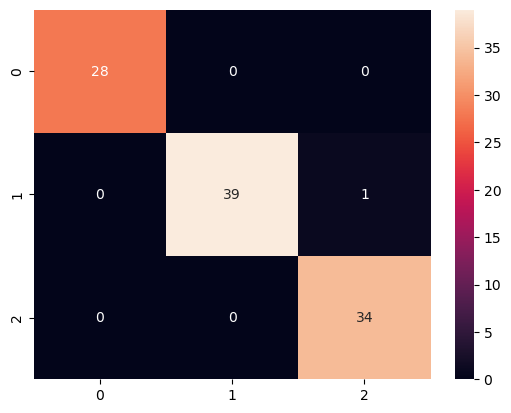

Fold 3 - Accuracy: 0.8431372549019608
Confusion matrix:


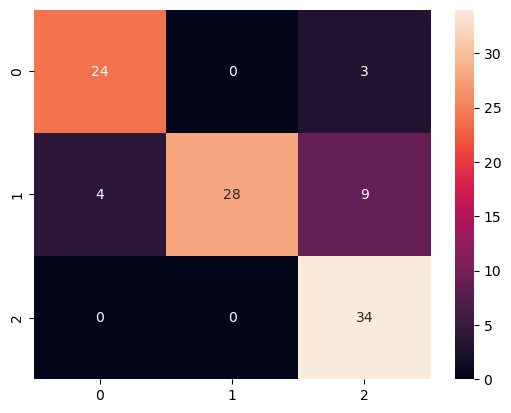

Fold 4 - Accuracy: 0.6470588235294118
Confusion matrix:


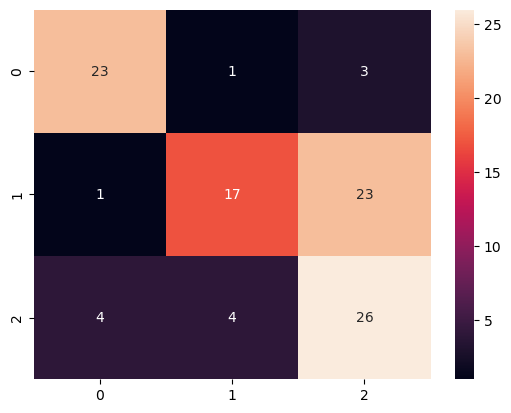

Fold 5 - Accuracy: 0.7227722772277227
Confusion matrix:


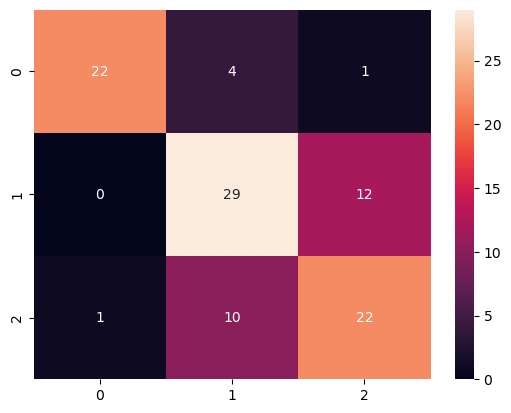

Fold 6 - Accuracy: 0.9306930693069307
Confusion matrix:


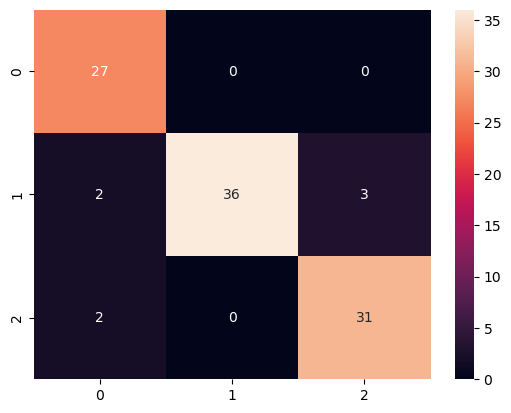

Fold 7 - Accuracy: 0.8316831683168316
Confusion matrix:


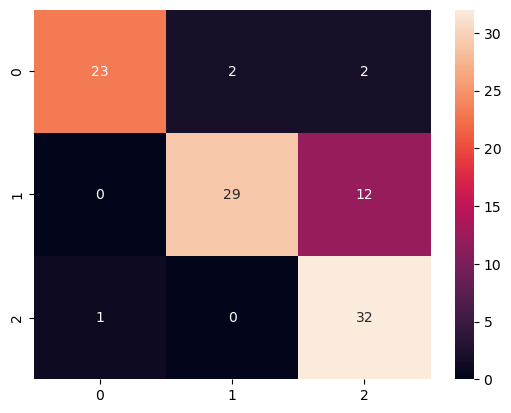

Fold 8 - Accuracy: 0.7623762376237624
Confusion matrix:


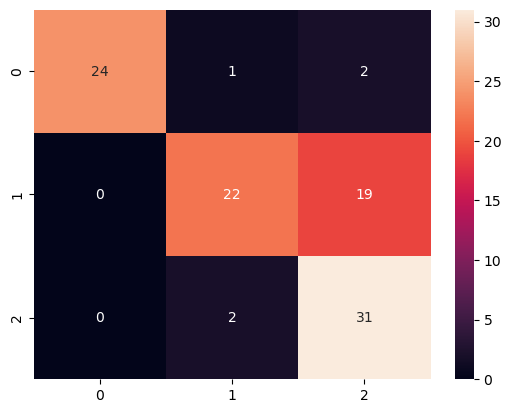

Fold 9 - Accuracy: 0.7821782178217822
Confusion matrix:


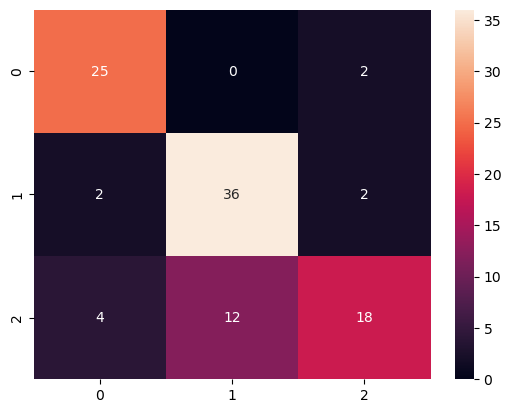

Fold 10 - Accuracy: 0.8514851485148515
Confusion matrix:


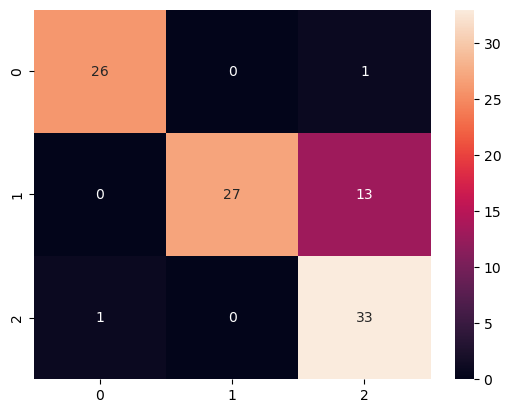

Average Accuracy: 0.8322364589400116


In [219]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_predict, StratifiedKFold
X = df.drop('RiskLevel', axis=1)
y = df['RiskLevel']
rf = RandomForestClassifier()
skf = StratifiedKFold(n_splits=10)

accuracies = []

for fold_idx, (train_index, val_index) in enumerate(skf.split(X, y)):
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y[train_index], y[val_index]
    rf.fit(X_train, y_train)
    y_val_pred = rf.predict(X_val)
    accuracy = accuracy_score(y_val, y_val_pred)
    accuracies.append(accuracy)
    print(f"Fold {fold_idx + 1} - Accuracy: {accuracy}")
    print("Confusion matrix:")
    cm = confusion_matrix(y_val, y_val_pred)
    sns.heatmap(cm, annot=True)
    plt.show()
avg_accuracy = np.mean(accuracies)
print("Average Accuracy:", avg_accuracy)


Fold 1 - Accuracy: 0.8431372549019608
Confusion matrix:


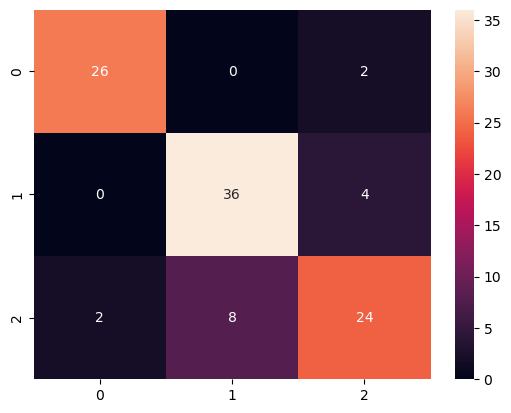

Fold 2 - Accuracy: 0.9117647058823529
Confusion matrix:


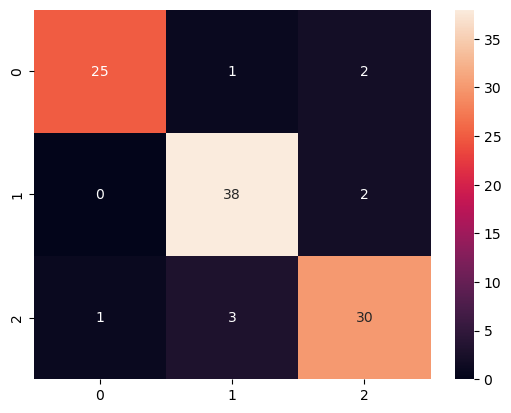

Fold 3 - Accuracy: 0.7156862745098039
Confusion matrix:


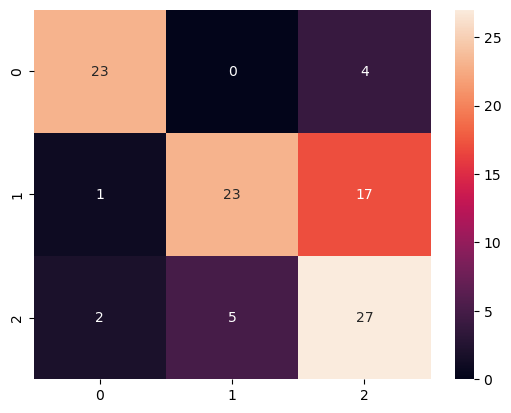

Fold 4 - Accuracy: 0.5294117647058824
Confusion matrix:


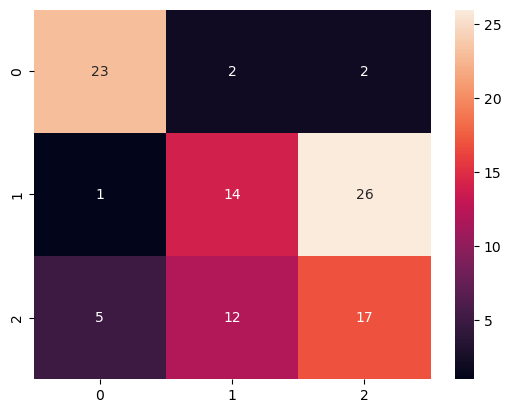

Fold 5 - Accuracy: 0.5346534653465347
Confusion matrix:


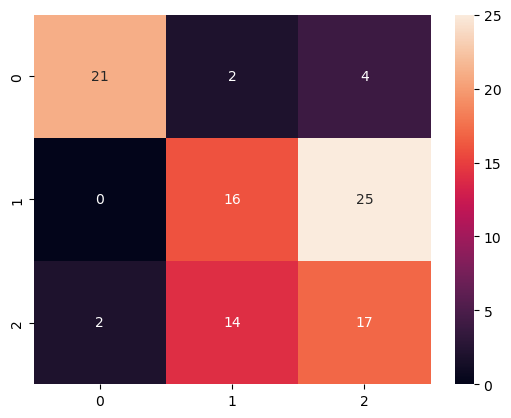

Fold 6 - Accuracy: 0.8712871287128713
Confusion matrix:


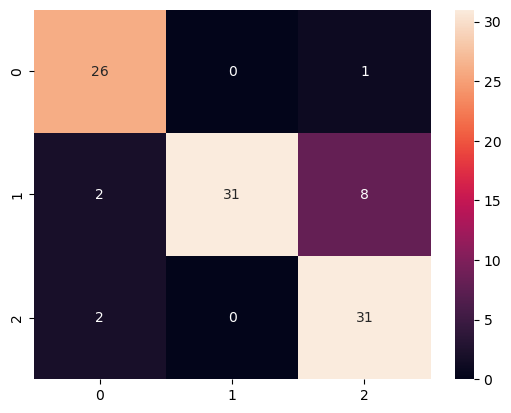

Fold 7 - Accuracy: 0.8316831683168316
Confusion matrix:


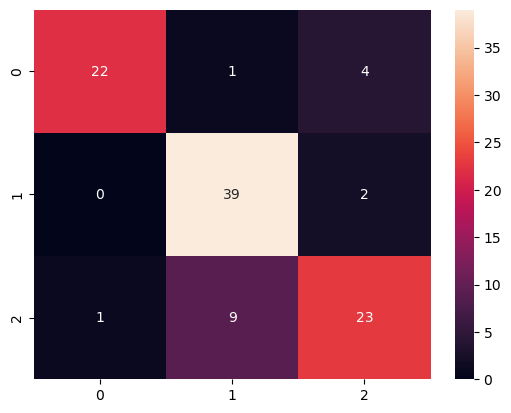

Fold 8 - Accuracy: 0.6336633663366337
Confusion matrix:


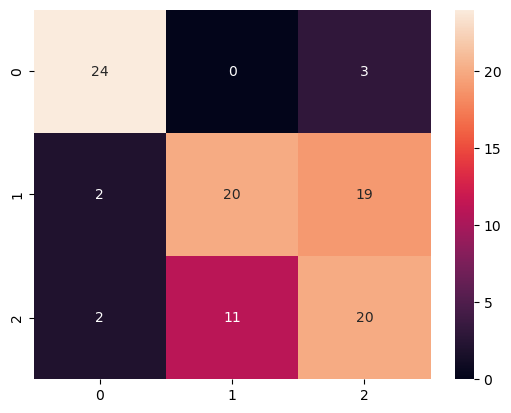

Fold 9 - Accuracy: 0.6435643564356436
Confusion matrix:


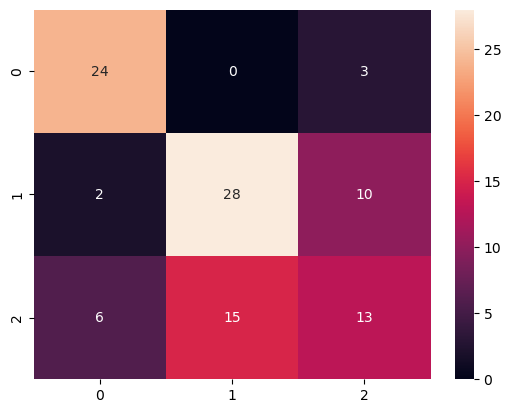

Fold 10 - Accuracy: 0.9207920792079208
Confusion matrix:


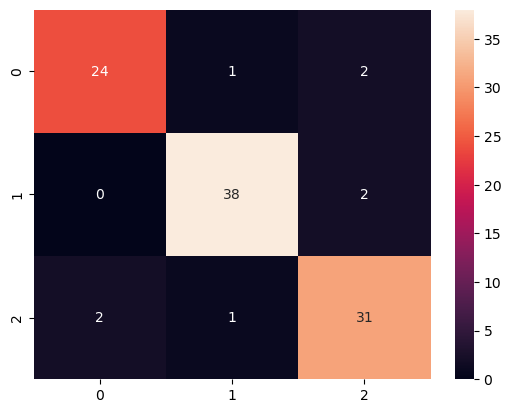

Average Accuracy: 0.7435643564356436


In [220]:

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import StratifiedKFold
import numpy as np
X = df.drop('RiskLevel', axis=1)
y = df['RiskLevel']
gb = GradientBoostingClassifier()
skf = StratifiedKFold(n_splits=10)

accuracies = []

for fold_idx, (train_index, val_index) in enumerate(skf.split(X, y)):
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y[train_index], y[val_index]
    gb.fit(X_train, y_train)
    y_val_pred = gb.predict(X_val)
    accuracy = accuracy_score(y_val, y_val_pred)
    accuracies.append(accuracy)
    print(f"Fold {fold_idx + 1} - Accuracy: {accuracy}")
    print("Confusion matrix:")
    cm = confusion_matrix(y_val, y_val_pred)
    cm = confusion_matrix(y_val, y_val_pred)
    sns.heatmap(cm, annot=True)
    plt.show()
avg_accuracy = np.mean(accuracies)
print("Average Accuracy:", avg_accuracy)


Fold 1 - Accuracy: 0.5392156862745098
Confusion matrix:


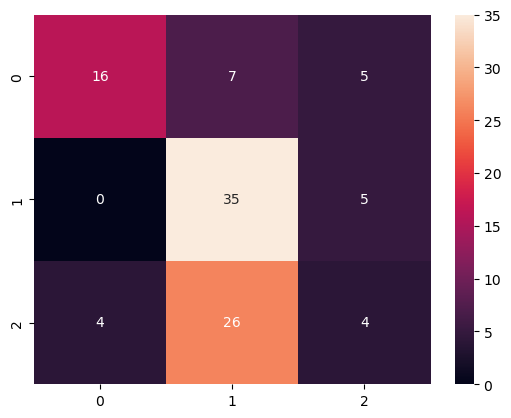

Fold 2 - Accuracy: 0.6666666666666666
Confusion matrix:


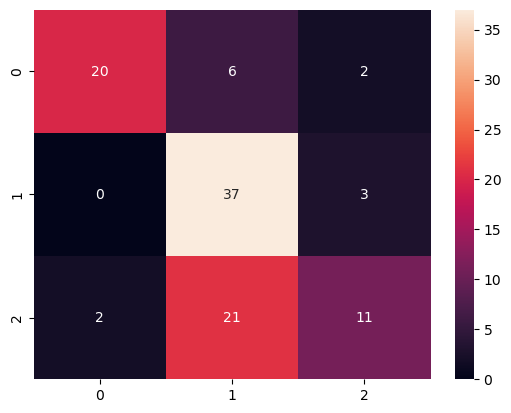

Fold 3 - Accuracy: 0.5784313725490197
Confusion matrix:


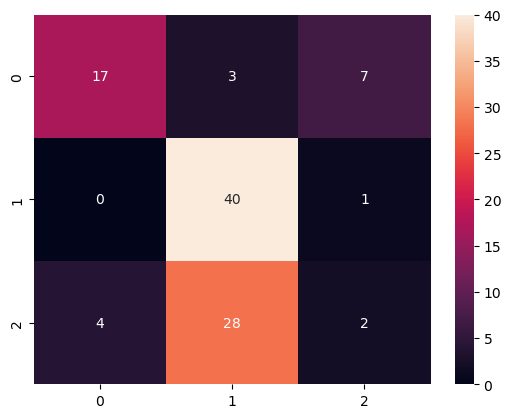

Fold 4 - Accuracy: 0.5784313725490197
Confusion matrix:


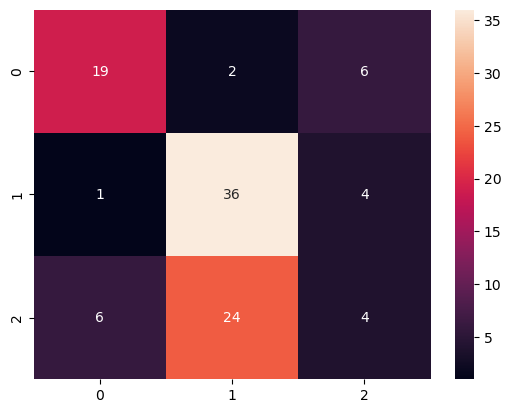

Fold 5 - Accuracy: 0.6534653465346535
Confusion matrix:


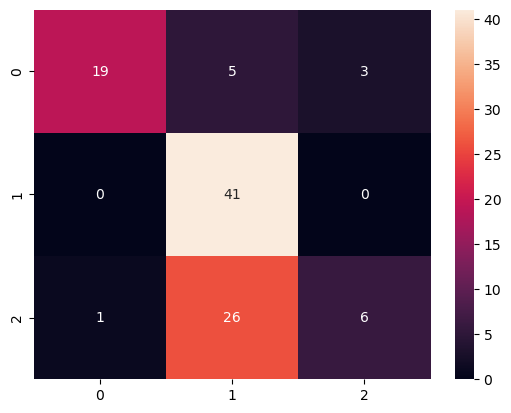

Fold 6 - Accuracy: 0.6435643564356436
Confusion matrix:


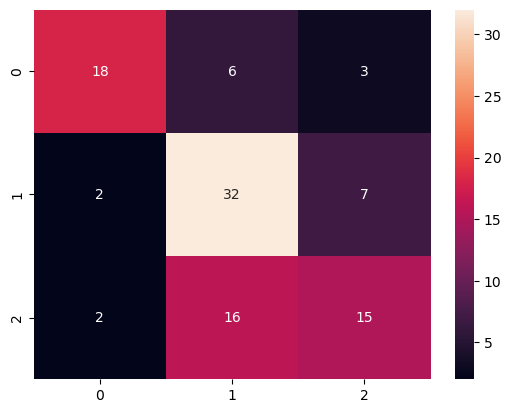

Fold 7 - Accuracy: 0.5841584158415841
Confusion matrix:


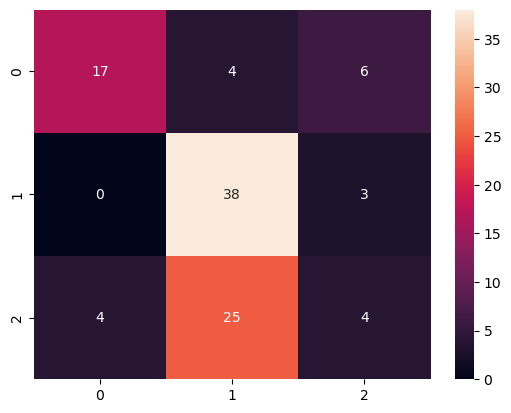

Fold 8 - Accuracy: 0.5643564356435643
Confusion matrix:


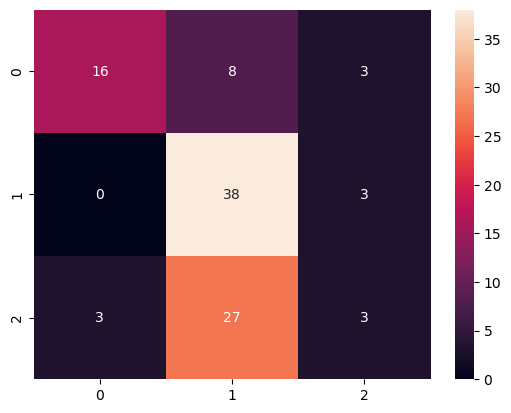

Fold 9 - Accuracy: 0.5643564356435643
Confusion matrix:


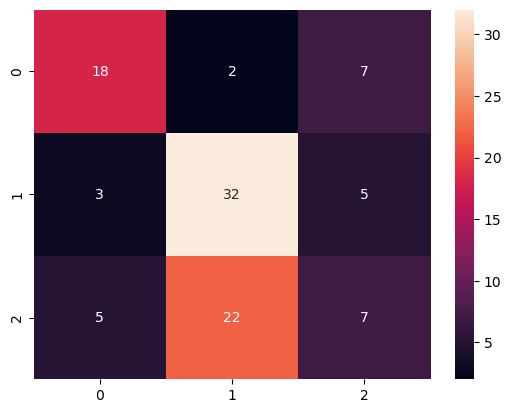

Fold 10 - Accuracy: 0.6237623762376238
Confusion matrix:


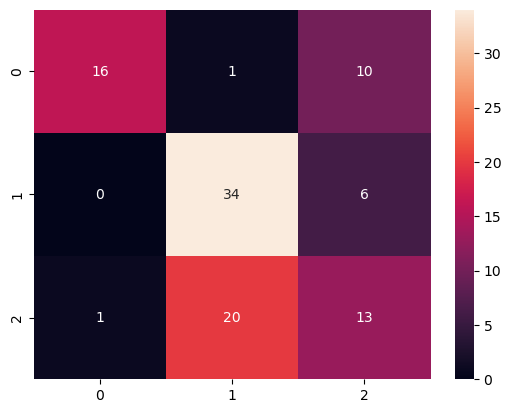

Average Accuracy: 0.5996408464375849


In [221]:
#naive bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import StratifiedKFold
import numpy as np
X = df.drop('RiskLevel', axis=1)
y = df['RiskLevel']
nb = GaussianNB()
skf = StratifiedKFold(n_splits=10)

accuracies = []

for fold_idx, (train_index, val_index) in enumerate(skf.split(X, y)):
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y[train_index], y[val_index]
    nb.fit(X_train, y_train)
    y_val_pred = nb.predict(X_val)
    accuracy = accuracy_score(y_val, y_val_pred)
    accuracies.append(accuracy)
    print(f"Fold {fold_idx + 1} - Accuracy: {accuracy}")
    print("Confusion matrix:")
    cm = confusion_matrix(y_val, y_val_pred)
    sns.heatmap(cm, annot=True)
    plt.show()
avg_accuracy = np.mean(accuracies)
print("Average Accuracy:", avg_accuracy)


C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Fold 1 - Accuracy: 0.7843137254901961
Confusion matrix:


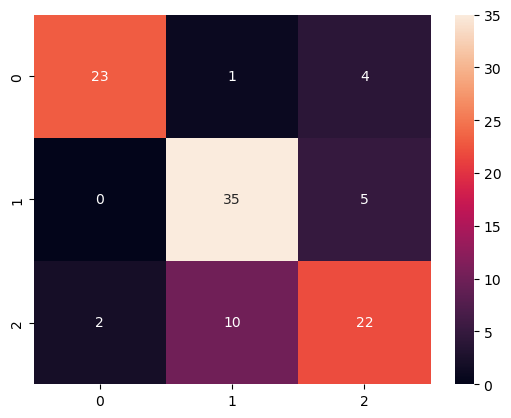

C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Fold 2 - Accuracy: 0.8137254901960784
Confusion matrix:


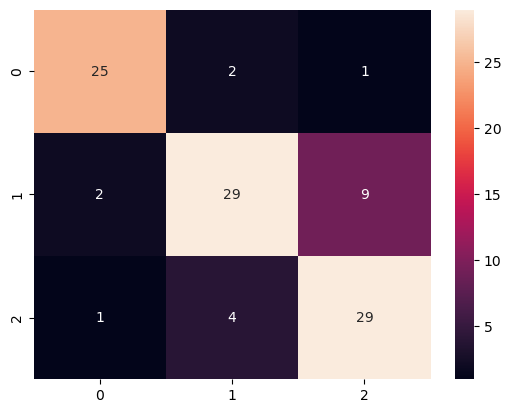

C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Fold 3 - Accuracy: 0.6862745098039216
Confusion matrix:


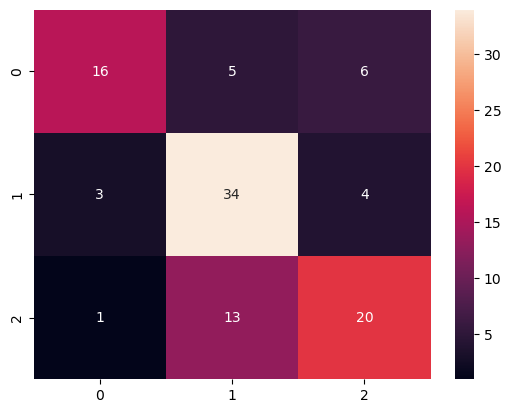

C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Fold 4 - Accuracy: 0.6078431372549019
Confusion matrix:


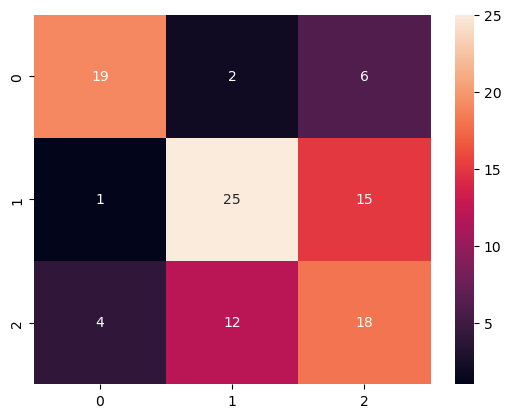

C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Fold 5 - Accuracy: 0.7128712871287128
Confusion matrix:


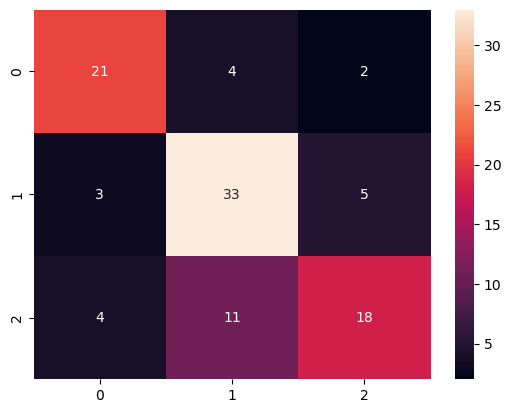

C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Fold 6 - Accuracy: 0.7326732673267327
Confusion matrix:


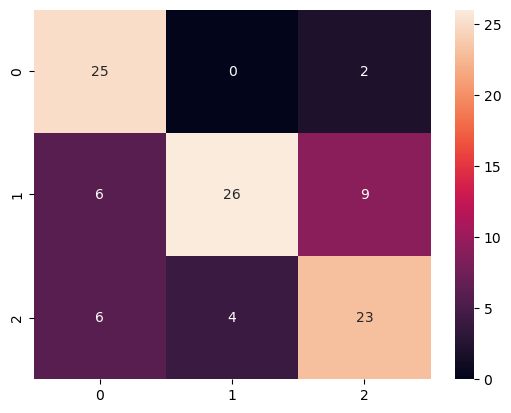

C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Fold 7 - Accuracy: 0.7326732673267327
Confusion matrix:


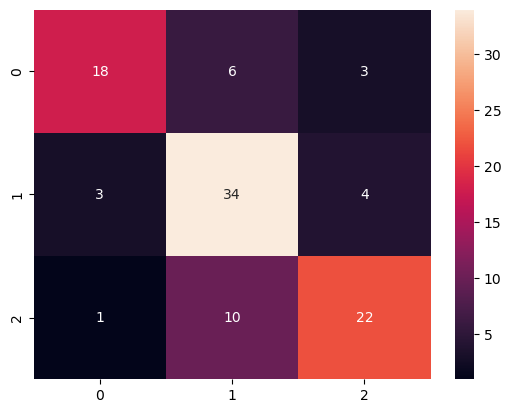

C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Fold 8 - Accuracy: 0.6138613861386139
Confusion matrix:


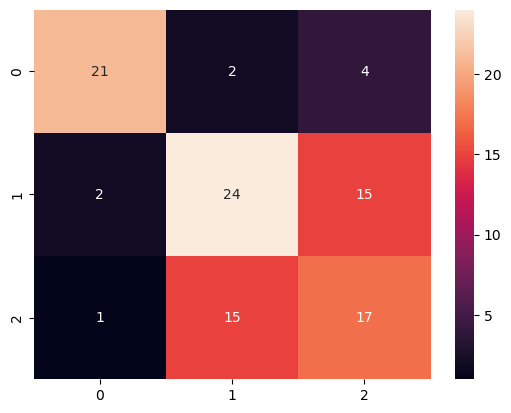

C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Fold 9 - Accuracy: 0.6138613861386139
Confusion matrix:


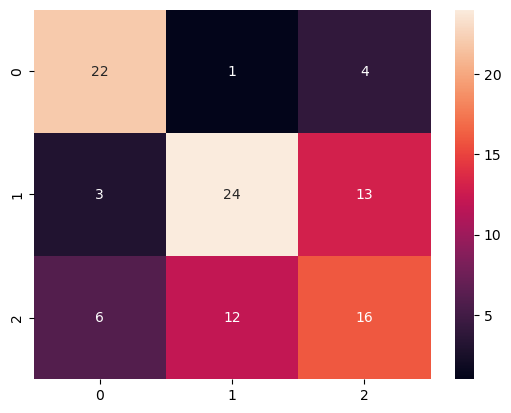

C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Fold 10 - Accuracy: 0.7425742574257426
Confusion matrix:


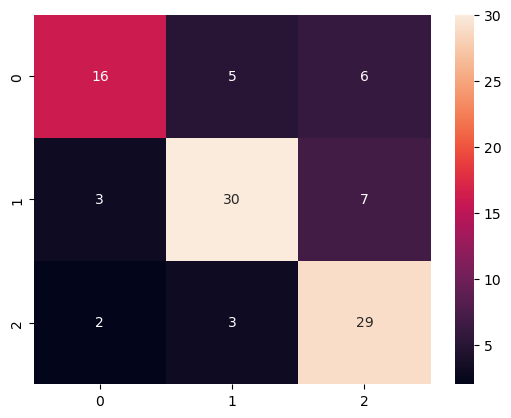

Average Accuracy: 0.7040671714230246


In [222]:
#knearest neighbour

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import StratifiedKFold
import numpy as np
X = df.drop('RiskLevel', axis=1)
y = df['RiskLevel']
knn = KNeighborsClassifier(n_neighbors=5)
skf = StratifiedKFold(n_splits=10)

accuracies = []  

for fold_idx, (train_index, val_index) in enumerate(skf.split(X, y)):
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y[train_index], y[val_index]
    knn.fit(X_train, y_train)
    y_val_pred = knn.predict(X_val)
    accuracy = accuracy_score(y_val, y_val_pred)
    accuracies.append(accuracy)
    print(f"Fold {fold_idx + 1} - Accuracy: {accuracy}")
    print("Confusion matrix:")
    cm = confusion_matrix(y_val, y_val_pred)
    sns.heatmap(cm, annot=True)
    plt.show()
avg_accuracy = np.mean(accuracies)
print("Average Accuracy:", avg_accuracy)


Fold 1 - Accuracy: 0.9607843137254902
Confusion matrix:


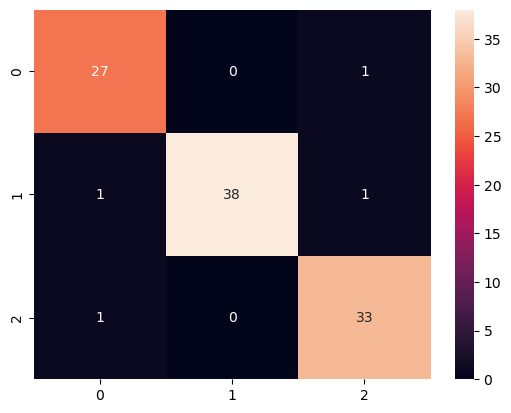

Fold 2 - Accuracy: 0.9705882352941176
Confusion matrix:


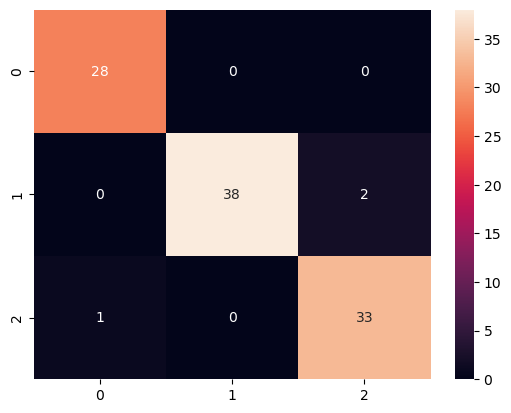

Fold 3 - Accuracy: 0.8529411764705882
Confusion matrix:


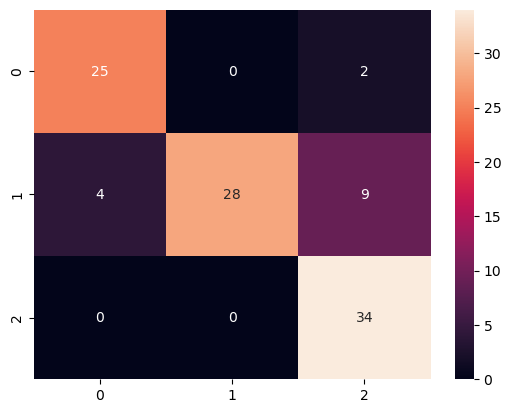

Fold 4 - Accuracy: 0.6568627450980392
Confusion matrix:


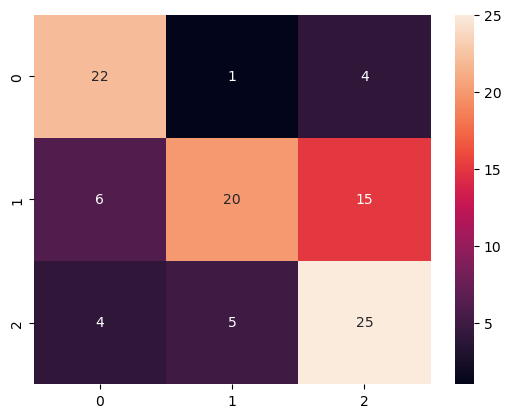

Fold 5 - Accuracy: 0.5742574257425742
Confusion matrix:


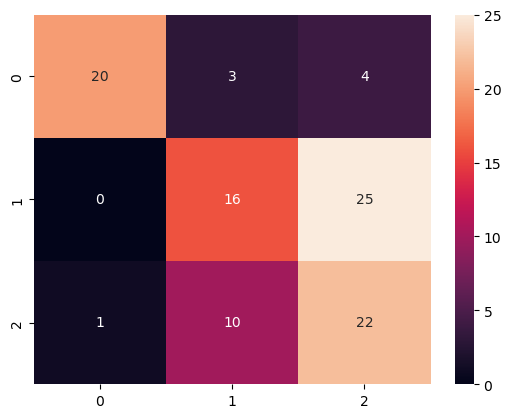

Fold 6 - Accuracy: 0.9306930693069307
Confusion matrix:


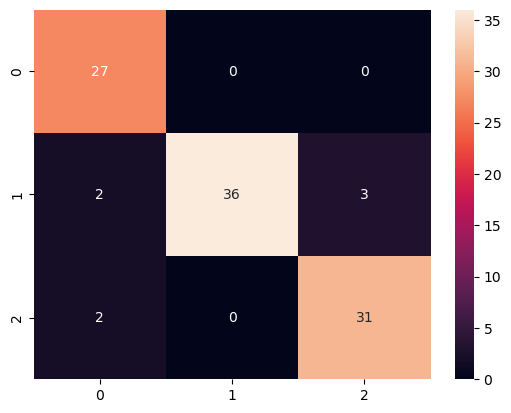

Fold 7 - Accuracy: 0.8514851485148515
Confusion matrix:


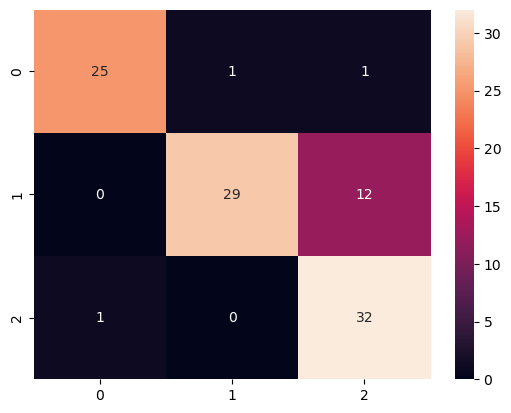

Fold 8 - Accuracy: 0.693069306930693
Confusion matrix:


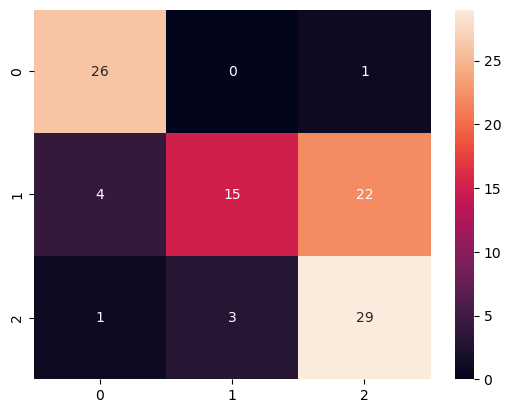

Fold 9 - Accuracy: 0.7920792079207921
Confusion matrix:


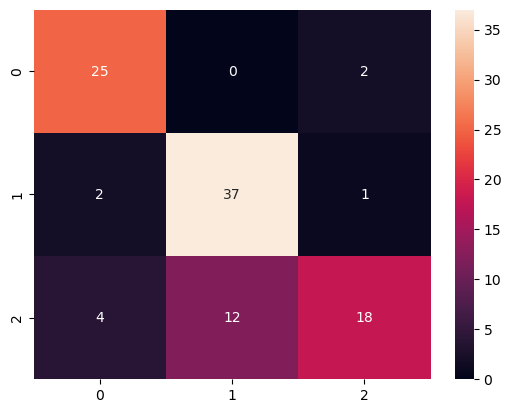

Fold 10 - Accuracy: 0.8415841584158416
Confusion matrix:


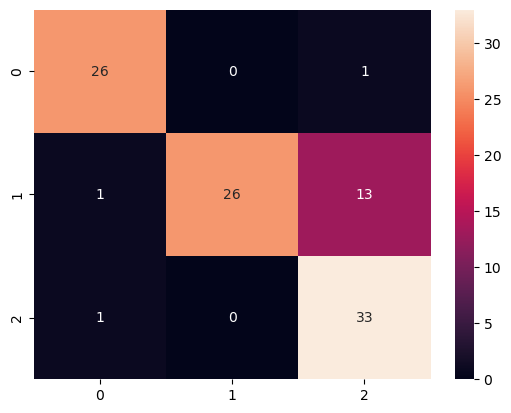

Average Accuracy: 0.8124344787419918


In [223]:
#decision trees

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import StratifiedKFold
import numpy as np
X = df.drop('RiskLevel', axis=1)
y = df['RiskLevel']
dt = DecisionTreeClassifier()
skf = StratifiedKFold(n_splits=10)

accuracies = []  

for fold_idx, (train_index, val_index) in enumerate(skf.split(X, y)):
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y[train_index], y[val_index]
    dt.fit(X_train, y_train)
    y_val_pred = dt.predict(X_val)
    accuracy = accuracy_score(y_val, y_val_pred)
    accuracies.append(accuracy)
    print(f"Fold {fold_idx + 1} - Accuracy: {accuracy}")
    print("Confusion matrix:")
    cm = confusion_matrix(y_val, y_val_pred)
    sns.heatmap(cm, annot=True)
    plt.show()
avg_accuracy = np.mean(accuracies)
print("Average Accuracy:", avg_accuracy)


Fold 1 Accuracy: 0.9411764705882353
Confusion matrix:


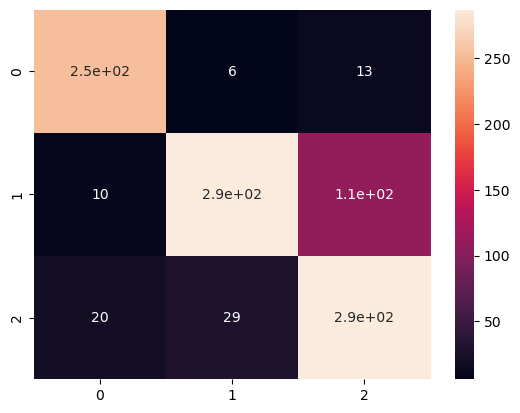

Fold 2 Accuracy: 0.9607843137254902
Confusion matrix:


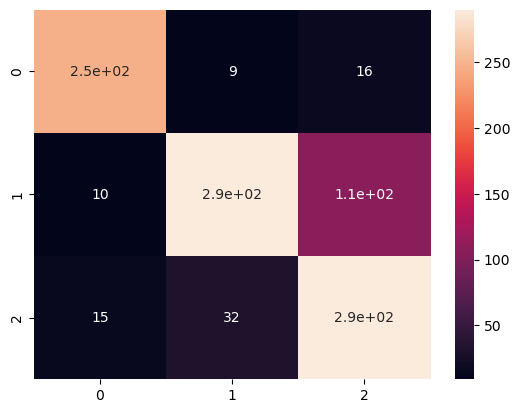

Fold 3 Accuracy: 0.8627450980392157
Confusion matrix:


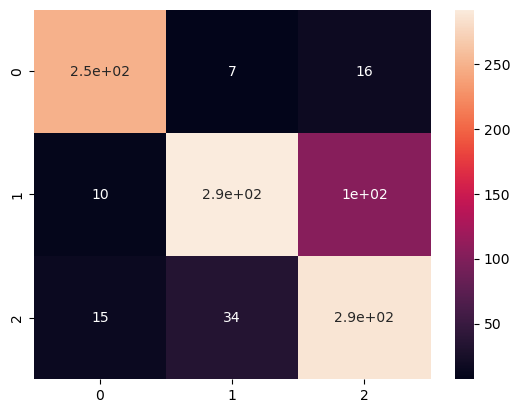

Fold 4 Accuracy: 0.6764705882352942
Confusion matrix:


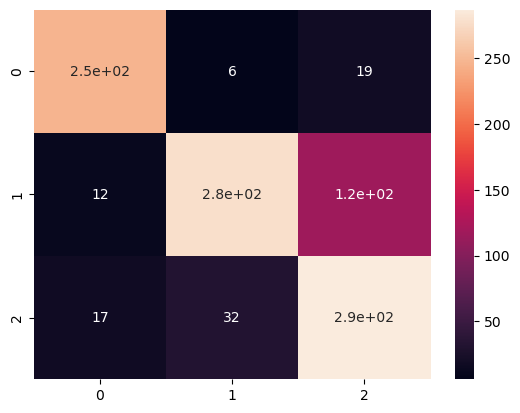

Fold 5 Accuracy: 0.5841584158415841
Confusion matrix:


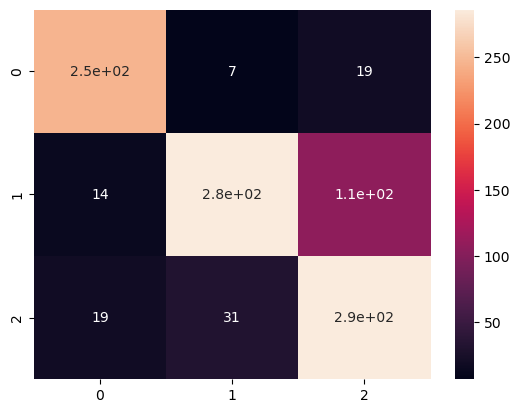

Fold 6 Accuracy: 0.9306930693069307
Confusion matrix:


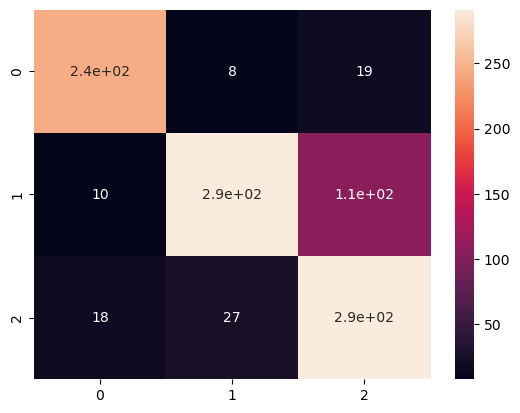

Fold 7 Accuracy: 0.8217821782178217
Confusion matrix:


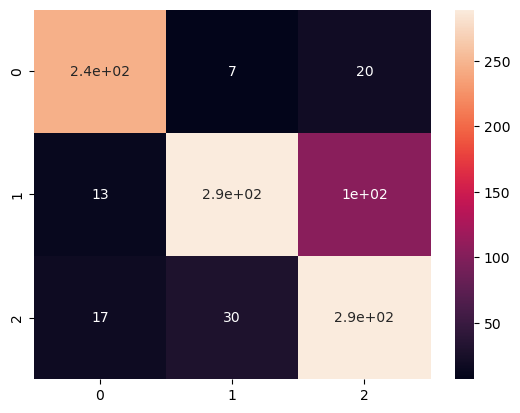

Fold 8 Accuracy: 0.7128712871287128
Confusion matrix:


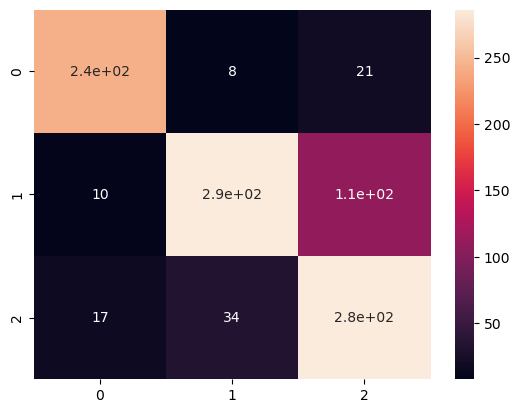

Fold 9 Accuracy: 0.7821782178217822
Confusion matrix:


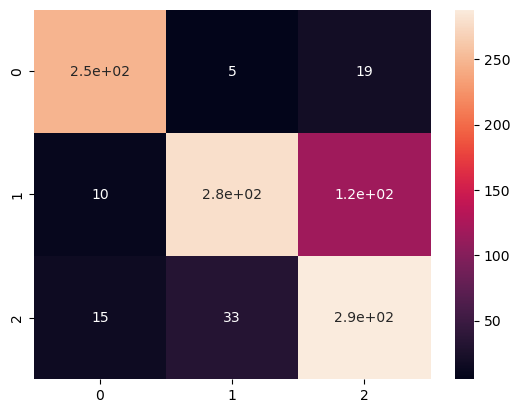

Fold 10 Accuracy: 0.8415841584158416
Confusion matrix:


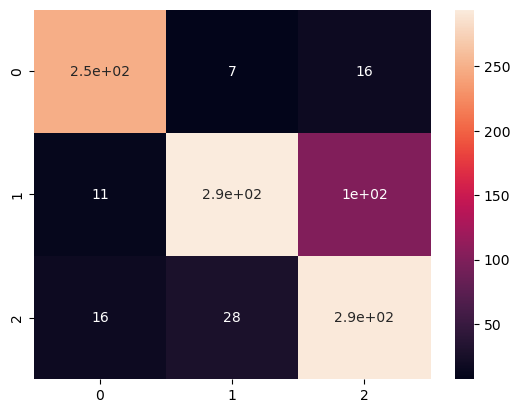

Average Accuracy: 0.8114443797320909


In [224]:
#bagging using decision tree classifier

from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix
X = df.drop('RiskLevel', axis=1)
y = df['RiskLevel']
base_classifier = DecisionTreeClassifier()
bagging_classifier = BaggingClassifier(base_classifier, n_estimators=10)
scores = cross_val_score(bagging_classifier, X, y, cv=10)
for fold_idx, score in enumerate(scores):
    bagging_classifier.fit(X, y)
    y_pred = cross_val_predict(bagging_classifier, X, y, cv=10)
    cm = confusion_matrix(y, y_pred)
    print(f"Fold {fold_idx + 1} Accuracy: {score}")
    print("Confusion matrix:")
    sns.heatmap(cm, annot=True)
    plt.show()
average_score = scores.mean()
print("Average Accuracy:", average_score)


Fold 1 Accuracy: 0.9803921568627451
Confusion matrix:


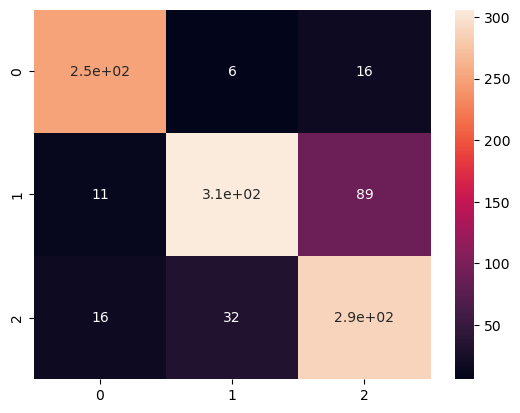

Fold 2 Accuracy: 0.9803921568627451
Confusion matrix:


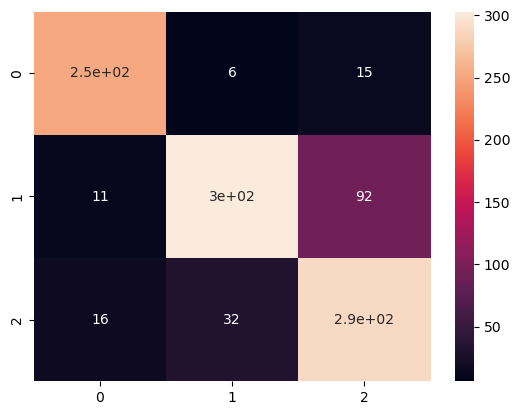

Fold 3 Accuracy: 0.8627450980392157
Confusion matrix:


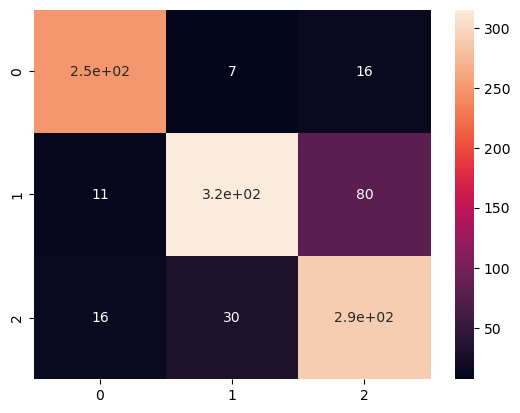

Fold 4 Accuracy: 0.6666666666666666
Confusion matrix:


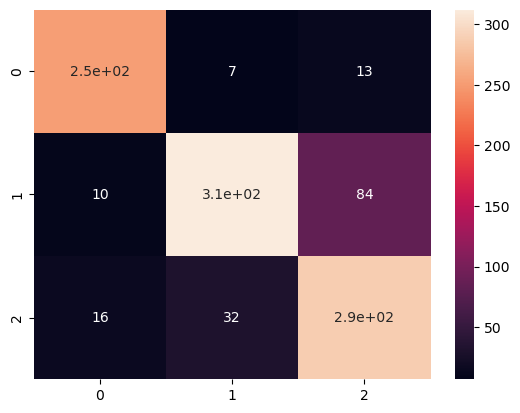

Fold 5 Accuracy: 0.6732673267326733
Confusion matrix:


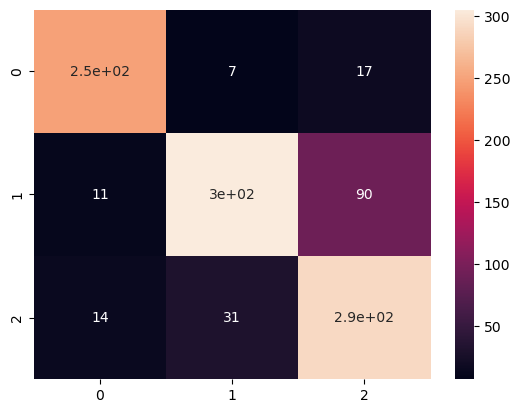

Fold 6 Accuracy: 0.9306930693069307
Confusion matrix:


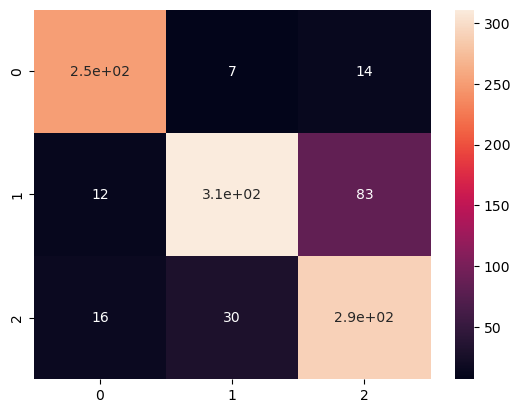

Fold 7 Accuracy: 0.8118811881188119
Confusion matrix:


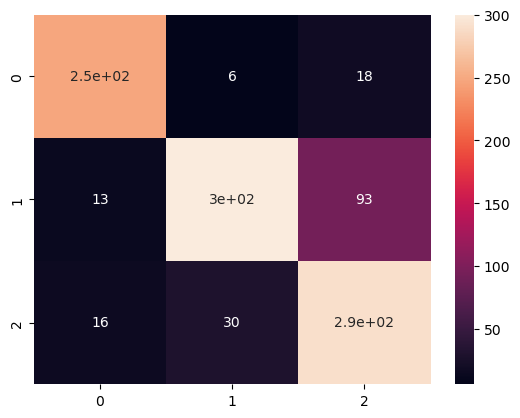

Fold 8 Accuracy: 0.801980198019802
Confusion matrix:


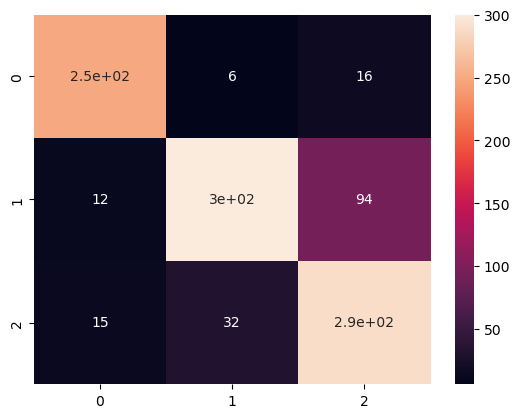

Fold 9 Accuracy: 0.7920792079207921
Confusion matrix:


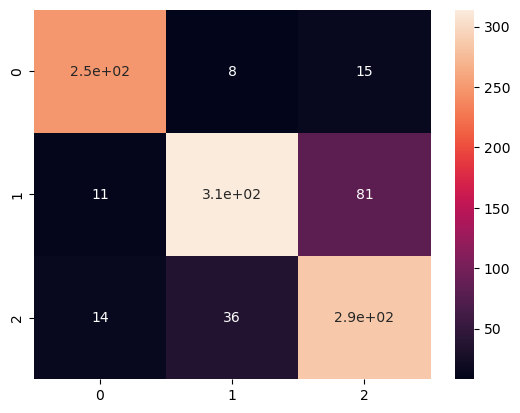

Fold 10 Accuracy: 0.8415841584158416
Confusion matrix:


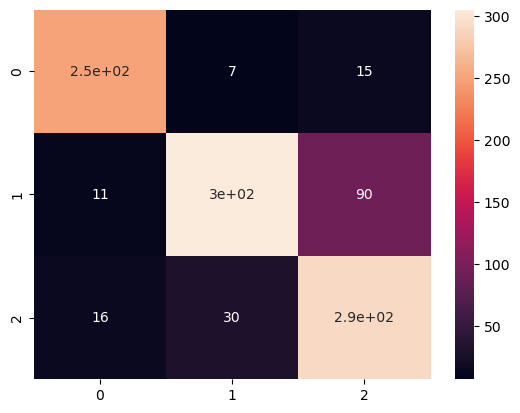

Average Accuracy: 0.8341681226946225


In [225]:
#adaboost

from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix
X = df.drop('RiskLevel', axis=1)
y = df['RiskLevel']
base_classifier = DecisionTreeClassifier()
adaboost_classifier = AdaBoostClassifier(base_classifier, n_estimators=10)
scores = cross_val_score(adaboost_classifier, X, y, cv=10)
for fold_idx, score in enumerate(scores):
    adaboost_classifier.fit(X, y)
    y_pred = cross_val_predict(adaboost_classifier, X, y, cv=10)
    cm = confusion_matrix(y, y_pred)
    print(f"Fold {fold_idx + 1} Accuracy: {score}")
    print("Confusion matrix:")
    sns.heatmap(cm, annot=True)
    plt.show()
average_score = scores.mean()
print("Average Accuracy:", average_score)


Fold 1 Accuracy: 0.9509803921568627
Confusion matrix:


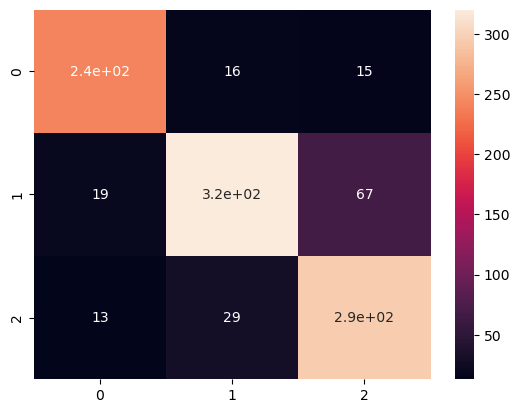

Fold 2 Accuracy: 0.9411764705882353
Confusion matrix:


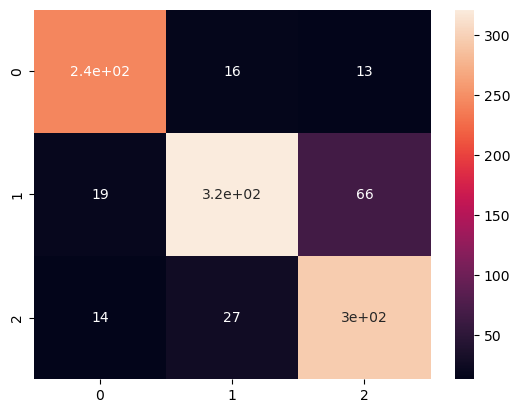

Fold 3 Accuracy: 0.8529411764705882
Confusion matrix:


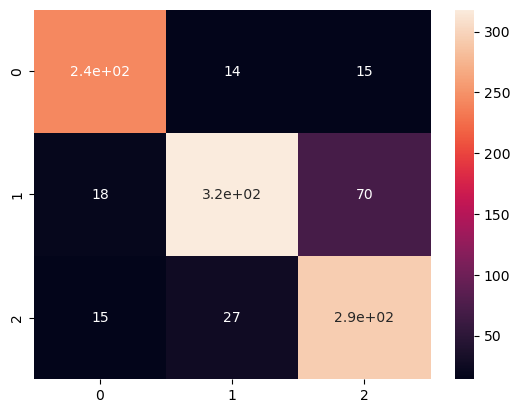

Fold 4 Accuracy: 0.7058823529411765
Confusion matrix:


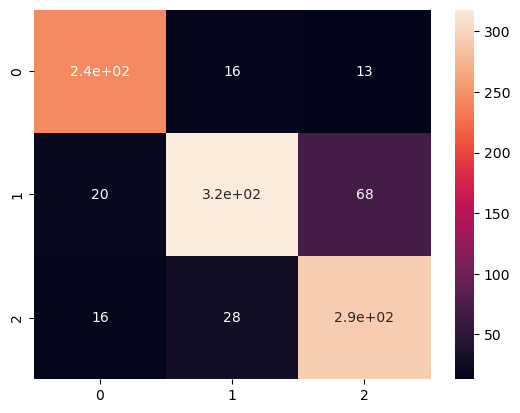

Fold 5 Accuracy: 0.7821782178217822
Confusion matrix:


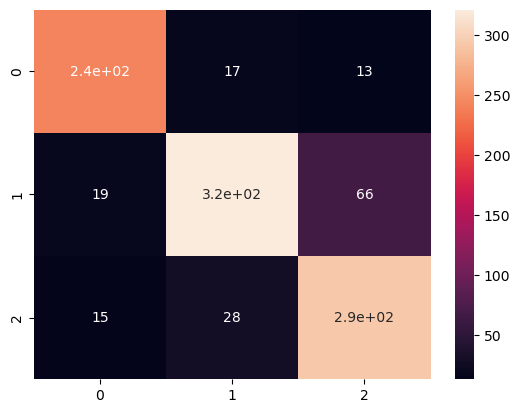

Fold 6 Accuracy: 0.9306930693069307
Confusion matrix:


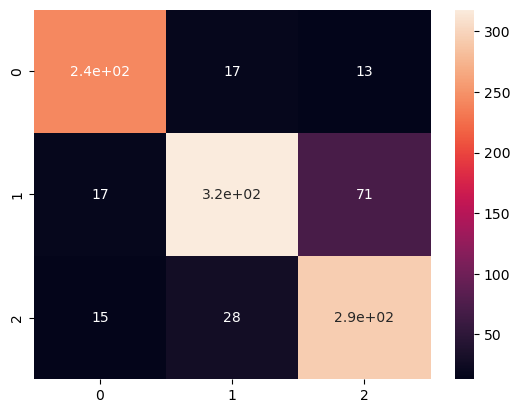

Fold 7 Accuracy: 0.8118811881188119
Confusion matrix:


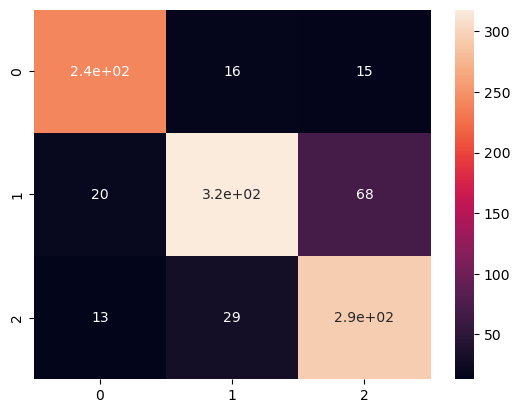

Fold 8 Accuracy: 0.8217821782178217
Confusion matrix:


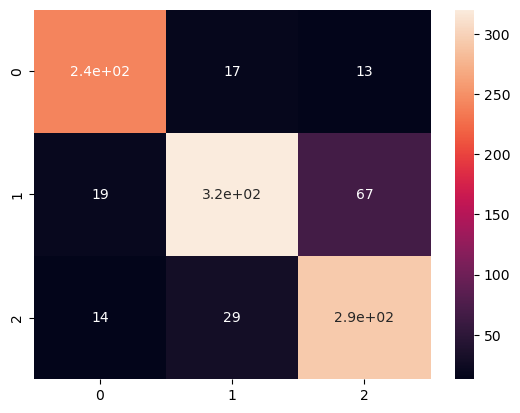

Fold 9 Accuracy: 0.7821782178217822
Confusion matrix:


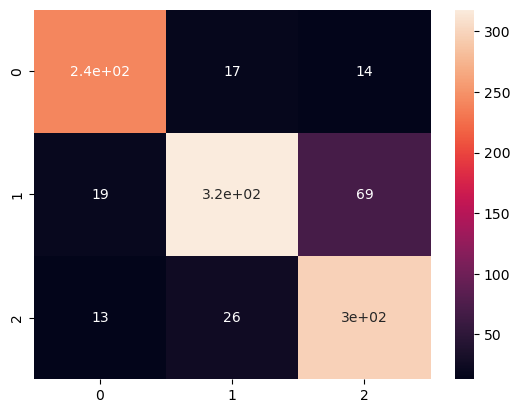

Fold 10 Accuracy: 0.8415841584158416
Confusion matrix:


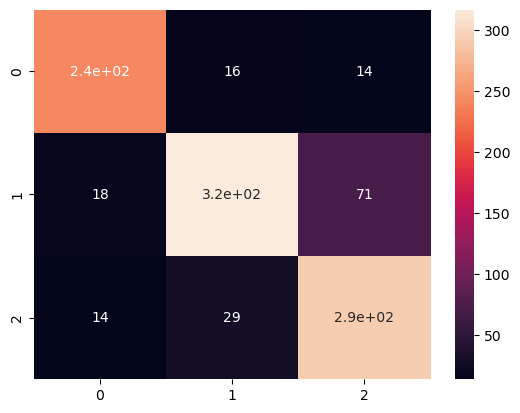

Average Accuracy: 0.8421277421859834


In [226]:
#PCA using random forest
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix
X = df.drop('RiskLevel', axis=1)
y = df['RiskLevel']
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
classifier = RandomForestClassifier()
scores = cross_val_score(classifier, X_pca, y, cv=10)
for fold_idx, score in enumerate(scores):
    classifier.fit(X_pca, y)
    y_pred = cross_val_predict(classifier, X_pca, y, cv=10)
    cm = confusion_matrix(y, y_pred)
    print(f"Fold {fold_idx + 1} Accuracy: {score}")
    print("Confusion matrix:")
    sns.heatmap(cm, annot=True)
    plt.show()
average_score = scores.mean()
print("Average Accuracy:", average_score)


C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fold 1 - Accuracy: 0.6176470588235294
Confusion matrix:


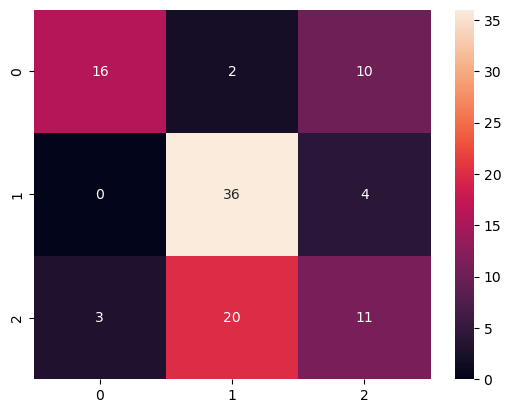

C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fold 2 - Accuracy: 0.6274509803921569
Confusion matrix:


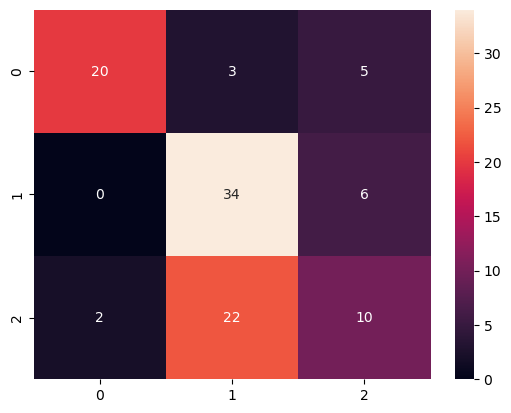

C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fold 3 - Accuracy: 0.5882352941176471
Confusion matrix:


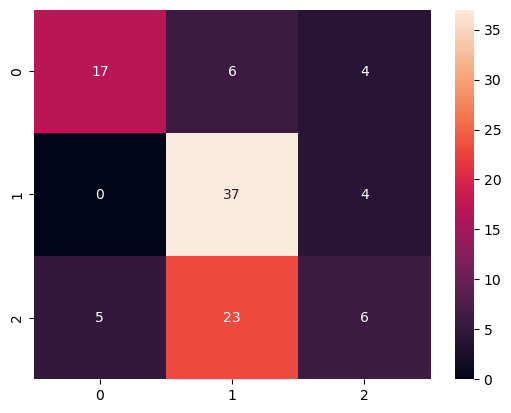

C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fold 4 - Accuracy: 0.6078431372549019
Confusion matrix:


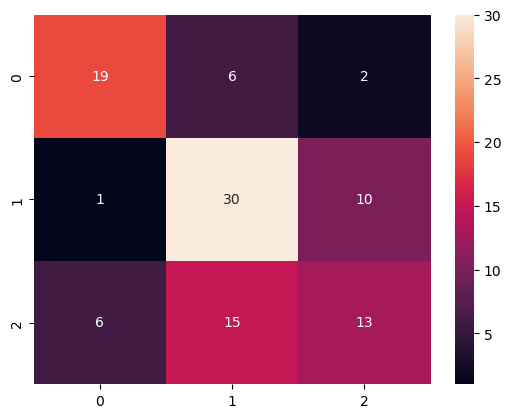

C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fold 5 - Accuracy: 0.5544554455445545
Confusion matrix:


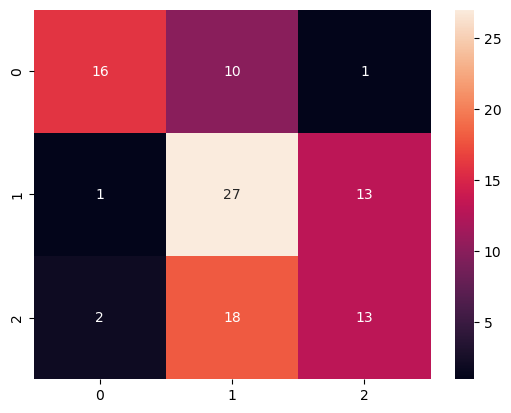

C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fold 6 - Accuracy: 0.5544554455445545
Confusion matrix:


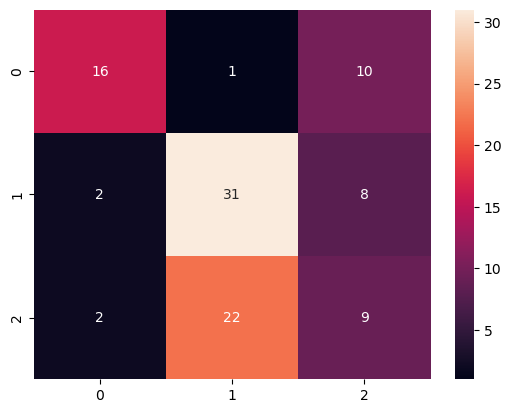

C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fold 7 - Accuracy: 0.6237623762376238
Confusion matrix:


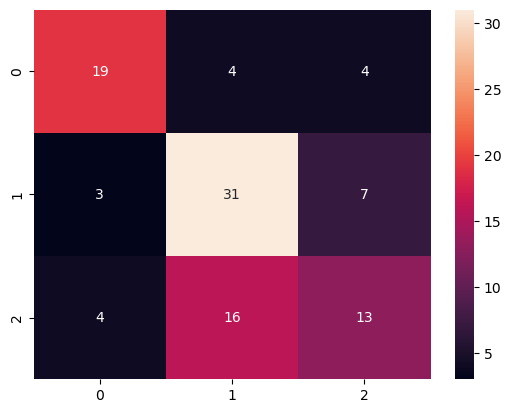

C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fold 8 - Accuracy: 0.46534653465346537
Confusion matrix:


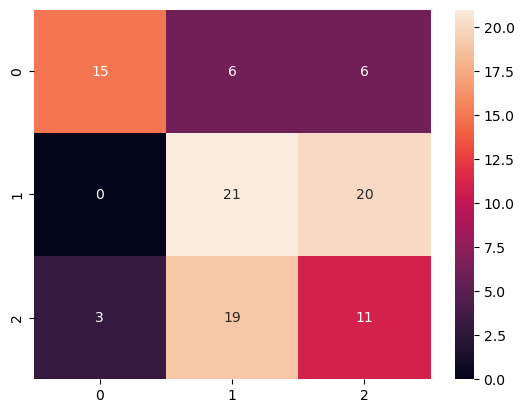

C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fold 9 - Accuracy: 0.5742574257425742
Confusion matrix:


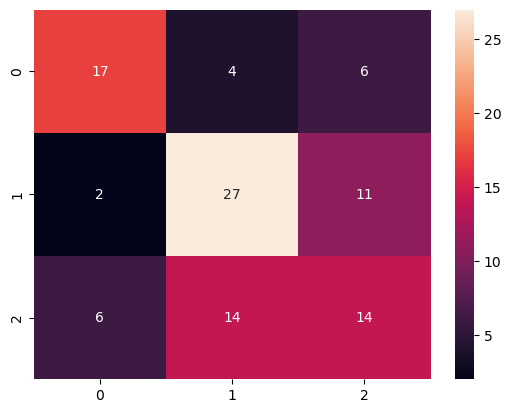

C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fold 10 - Accuracy: 0.6039603960396039
Confusion matrix:


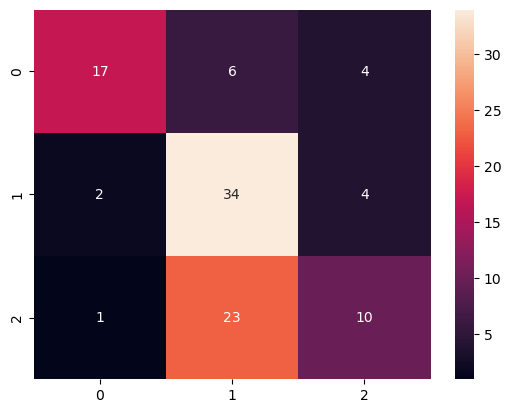

Average Accuracy: 0.5817414094350611


In [227]:
#gradient descent with logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix
X = df.drop('RiskLevel', axis=1)
y = df['RiskLevel']
logreg = LogisticRegression()
skf = StratifiedKFold(n_splits=10)

accuracies = []  

for fold_idx, (train_index, val_index) in enumerate(skf.split(X, y)):
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]
    logreg.fit(X_train, y_train)
    y_val_pred = logreg.predict(X_val)
    accuracy = accuracy_score(y_val, y_val_pred)
    accuracies.append(accuracy)
    print(f"Fold {fold_idx + 1} - Accuracy: {accuracy}")
    print("Confusion matrix:")
    cm = confusion_matrix(y_val, y_val_pred)
    sns.heatmap(cm, annot=True)
    plt.show()
avg_accuracy = np.mean(accuracies)
print("Average Accuracy:", avg_accuracy)


In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
import tkinter as tk
from tkinter import messagebox
import winsound

df = pd.read_csv('Dataset.csv')

X = df.drop('RiskLevel', axis=1)
y = df['RiskLevel']
n_components = 5
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X)
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_pca, y)

def predict_risk():
    age = int(age_entry.get())
    systolic_bp = int(systolic_bp_entry.get())
    diastolic_bp = int(diastolic_bp_entry.get())
    bs = float(bs_entry.get())
    body_temp = float(body_temp_entry.get())
    heart_rate = int(heart_rate_entry.get())

    data = pd.DataFrame({
        'Age': [age],
        'SystolicBP': [systolic_bp],
        'DiastolicBP': [diastolic_bp],
        'BS': [bs],
        'BodyTemp (In Fahrenheit)': [body_temp],
        'HeartRate': [heart_rate]
    })

    user_data_pca = pca.transform(data)
    risk_level = rf_classifier.predict(user_data_pca)
    messagebox.showinfo("Risk Level Prediction", f"The predicted risk level of the pregnant patient is: {risk_level[0]}")

    if risk_level[0] == 'low risk':
        winsound.Beep(1000, 1000)  # Single beep for low risk
    elif risk_level[0] == 'mid risk':
        winsound.Beep(1000, 1000)  # Double beep for mid risk
        winsound.Beep(1000, 1000)
    elif risk_level[0] == 'high risk':
        winsound.Beep(1000, 1000)  # Triple beep for high risk
        winsound.Beep(1000, 1000)
        winsound.Beep(1000, 1000)


def on_submit(event=None):
    predict_risk()

window = tk.Tk()
window.title("Risk Level Prediction")
window.geometry("400x300")

age_label = tk.Label(window, text="Age:")
age_label.pack()
age_entry = tk.Entry(window)
age_entry.pack()

systolic_bp_label = tk.Label(window, text="Systolic BP:")
systolic_bp_label.pack()
systolic_bp_entry = tk.Entry(window)
systolic_bp_entry.pack()

diastolic_bp_label = tk.Label(window, text="Diastolic BP:")
diastolic_bp_label.pack()
diastolic_bp_entry = tk.Entry(window)
diastolic_bp_entry.pack()

bs_label = tk.Label(window, text="BS:")
bs_label.pack()
bs_entry = tk.Entry(window)
bs_entry.pack()

body_temp_label = tk.Label(window, text="Body Temperature:")
body_temp_label.pack()
body_temp_entry = tk.Entry(window)
body_temp_entry.pack()

heart_rate_label = tk.Label(window, text="Heart Rate:")
heart_rate_label.pack()
heart_rate_entry = tk.Entry(window)
heart_rate_entry.pack()

submit_button = tk.Button(window, text="Submit", command=on_submit)
submit_button.pack()

window.bind('<Return>', on_submit)


window.mainloop()
